# Analyzing MUBI Movies Data: Genre Performance & Content Strategy

---

## Project Overview

| | |
|---|---|
| **Objective** | Analyze MUBI movie data to uncover genre performance patterns for content strategy optimization |
| **Dataset** | 226,575 movies across 19 genres (1898–2021) |
| **Key Finding** | Production volume does not predict quality—genre-specific strategies required |
| **Tools** | Python, SQL, Pandas, NumPy, Statsmodels, SciPy, Matplotlib, Seaborn |
| **Methods** | Correlation Analysis, OLS Regression, Two-Sample T-Tests, Temporal Trend Analysis |

---

## Table of Contents
- [1. Executive Summary](#1.-Executive-Summary)
- [2. Introduction](#2.-Introduction)
- [3. Importing Modules and Loading Dataset](#3.-Importing-Modules-and-Loading-Dataset)
- [4. Data Cleaning and Preparation](#4.-Data-Cleaning-and-Preparation)
  - [4.1 Data Validation: Checking for Duplicates](#4.1-Data-Validation:-Checking-for-Duplicates)
- [5. Initial Exploratory Data Analysis](#5.-Initial-Exploratory-Data-Analysis)
  - [5.1 Identifying Rated and Unrated Movies](#5.1-Identifying-Rated-and-Unrated-Movies)
  - [5.2 Data Enrichment (Genre Merge)](#5.2-Data-Enrichment-(Genre-Merge))
- [6. Exploratory Data Analysis Continuation](#6.-Exploratory-Data-Analysis-Continuation)
  - [6.1 Genre Distribution and Performance](#6.1-Genre-Distribution-and-Performance)
  - [6.2 Cross-Sectional Genre Analysis by Volume, Rating and Popularity](#6.2-Cross-Sectional-Genre-Analysis-by-Volume,-Rating-and-Popularity)
      - [6.2.1 Rating Distribution](#6.2.1-Rating-Distribution)
      - [6.2.2 Popularity Distribution](#6.2.2-Popularity-Distribution)
      - [6.2.3 Genre-Level Performance Overview](#6.2.3-Genre-Level-Performance-Overview)
  - [6.3 Temporal Genre Analysis by Movie Count (Volume), Ratings, and Popularity](#6.3-Temporal-Genre-Analysis-by-Movie-Count-(Volume),-Ratings,-and-Popularity)
  - [6.4 User Engagement and Community Quality](#6.4-User-Engagement-and-Community-Quality)
- [7. Statistical and Regression Analysis](#7.-Statistical-and-Regression-Analysis)
  - [7.1 Cross-Sectional Analysis: Production Volume vs. Quality](#7.1-Cross-Sectional-Analysis:-Production-Volume-vs.-Quality)
    - [7.1.1 Correlation Analysis](#7.1.1-Correlation-Analysis)
    - [7.1.2 Regression Analysis](#7.1.2-Regression-Analysis)
    - [7.1.3 Group Comparison (Two-Sample T-Test)](#7.1.3-Group-Comparison-(Two-Sample-T-Test))
    - [7.1.4 Cross-Sectional Analysis Summary](#7.1.4-Cross-Sectional-Analysis-Summary)
  - [7.2 Temporal Genre Performance: Stability and Trend Analysis](#7.2-Temporal-Genre-Performance:-Stability-and-Trend-Analysis)
    - [7.2.1 Data Scope and Preparation](#7.2.1-Data-Scope-and-Preparation)
    - [7.2.2 Genre Trend Analysis](#7.2.2-Genre-Trend-Analysis)
    - [7.2.3 Genre Volatility Analysis](#7.2.3-Genre-Volatility-Analysis)
    - [7.2.4 Volume-Quality Analysis Within High-Production Genres](#7.2.4-Volume-Quality-Analysis-Within-High-Production-Genres)
    - [7.2.5 Temporal Analysis Summary](#7.2.5-Temporal-Analysis-Summary)
  - [7.3 User Engagement Statistical Analysis](#7.3-User-Engagement-Statistical-Analysis)
    - [7.3.1 Critique Volume vs Engagement Quality Correlation](#7.3.1-Critique-Volume-vs-Engagement-Quality-Correlation)
    - [7.3.2 Group Comparison: High-Volume vs Low-Volume Engagement](#7.3.2-Group-Comparison:-High-Volume-vs-Low-Volume-Engagement)
    - [7.3.3 Genre Rating vs Engagement Quality](#7.3.3-Genre-Rating-vs-Engagement-Quality)
    - [7.3.4 User Engagement Summary](#7.3.4-User-Engagement-Summary)
- [8. Conclusions and Recommendations](#8.-Conclusions-and-Recommendations)
  - [8.1 Key Findings](#8.1-Key-Findings)
  - [8.2 Critical Methodological Insight](#8.2-Critical-Methodological-Insight)
  - [8.3 Strategic Recommendations](#8.3-Strategic-Recommendations)
  - [8.4 Limitations](#8.4-Limitations)
  - [8.5 Future Research](#8.5-Future-Research)

## 1. Executive Summary

Analysis of 226,575 movies across 19 genres reveals that **production volume does not systematically predict content quality or user engagement**.

**Key findings:**

- **Cross-sectional analysis:** No correlation between genre volume and ratings (r = 0.175, p = 0.472)
- **Temporal analysis:** Quality degradation is genre-specific — Documentary and Romance show significant decline with scaling (p < 0.01), while Comedy and Thriller maintain quality
- **Engagement analysis:** Critique engagement is driven by genre identity and community culture, not volume or ratings

**Strategic implication:** Content optimization requires genre-by-genre strategies rather than universal volume policies. High-quality genres like Documentary face scaling risks, while mainstream genres like Drama demonstrate that quality and scale can coexist.

## 2. Introduction

I am stepping into the role of a Data Analyst to lead a high-impact project for a media analytics company that specializes in streaming platform insights. In this project, I analyze the MUBI movie dataset aiming to uncover trends between ratings, genres, and movie success to help guide marketing, investment, and promotional strategies.

The analysis leverages two datasets: the [MUBI SVOD Platform Database for Movie Lovers Dataset](https://www.kaggle.com/datasets/clementmsika/mubi-sqlite-database-for-movie-lovers), and the [TMDB Movie Dataset](https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies). While MUBI provides movies and user ratings, it lacks the `movie_genre column`, which was enriched using the TMDB dataset.

The MUBI dataset consists of two tables: `movies` and `ratings`. Key features include:

**movies**

| Column Name | Data Type | Description                          |
| ----------- | --------- | ------------------------------------ |
| `movie_id`  | INTEGER   | ID related to the movie on Mubi      |
| `movie_title`| TEXT      | Name of the movie                   |
| `movie_release_year`| INTEGER   | Release year of the movie    |
| `movie_popularity`| INTEGER | Number of Mubi users who love this movie|
| `director_id`| INTEGER   | ID related to the movie director on Mubi|
| `director_name`    | TEXT      |	Full Name of the movie director|
| `rating` | FLOAT | Movie rating, based on Mubi user ratings | 

**ratings**

| Column Name | Data Type | Description                          |
| ----------- | --------- | ------------------------------------ |
| `movie_id` | INTEGER   | Movie ID associated with the rating       |
| `rating_id`   | INTEGER   | Rating ID on Mubi       |
| `rating_score` | INTEGER | score ranging from 1 (lowest) to 5 (highest) |
| `critique`| TEXT | User critique: "None" indicates no critique was written|
| `critique_likes` | INTEGER | Number of likes on the critique|
| `critique_comments` | INTEGER | Number of comments on the critique| 

## 3. Importing Modules and Loading Dataset

In [1]:
# Import required libraries
import warnings
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr, spearmanr
from wordcloud import WordCloud

# Configuration
warnings.filterwarnings("ignore")
sns.reset_defaults()

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# Connect to the SQLite `mubi_movies_ratings.db` database
connection = sqlite3.connect("mubi_movies_ratings.db")

Verify connection to the database by querying the database to retrieve the first five rows from the `movies` table using pandas.

In [3]:
# Query to get the first element from the movies table
query_movies = """
SELECT *
FROM movies;
"""
# Run query
df_movies = pd.read_sql_query(query_movies, connection)

In [4]:
df_movies.head()

,movie_id,movie_title,movie_release_year,movie_url,movie_title_language,movie_popularity,movie_image_url,director_id,director_name,director_url,rating
0,1,La Antena,2007.0,http://mubi.com/films/la-antena,en,105,https://images.mubicdn.net/images/film/1/cache...,131,Esteban Sapir,http://mubi.com/cast/esteban-sapir,3.8
1,2,Elementary Particles,2006.0,http://mubi.com/films/elementary-particles,en,23,https://images.mubicdn.net/images/film/2/cache...,73,Oskar Roehler,http://mubi.com/cast/oskar-roehler,2.9
2,3,It's Winter,2006.0,http://mubi.com/films/its-winter,en,21,https://images.mubicdn.net/images/film/3/cache...,82,Rafi Pitts,http://mubi.com/cast/rafi-pitts,3.4
3,4,Kirikou and the Wild Beasts,2005.0,http://mubi.com/films/kirikou-and-the-wild-beasts,en,46,https://images.mubicdn.net/images/film/4/cache...,"89, 90","Michel Ocelot, Bénédicte Galup","http://mubi.com/cast/michel-ocelot, http://mub...",3.8
4,5,Padre Nuestro,2007.0,http://mubi.com/films/padre-nuestro,en,7,https://images.mubicdn.net/images/film/5/cache...,92,Christopher Zalla,http://mubi.com/cast/christopher-zalla,3.3


In [5]:
df_movies.describe()

,movie_id,movie_release_year,movie_popularity,rating
count,226575.000000,226570.000000,226575.000000,142572.000000
mean,142453.983776,1994.839471,12.819508,3.015933
std,73561.405863,24.513281,177.346589,0.866211
min,1.000000,1878.000000,0.000000,1.000000
25%,83783.500000,1981.000000,0.000000,2.500000
50%,146575.000000,2004.000000,0.000000,3.000000
75%,205852.500000,2014.000000,1.000000,3.600000
max,263710.000000,2021.000000,13989.000000,5.000000


In [6]:
# Identify missing values in the `movies` table
df_movies.isnull().sum()

movie_id                    0
movie_title                 0
movie_release_year          5
movie_url                   0
movie_title_language        0
movie_popularity            0
movie_image_url         17418
director_id                 0
director_name               3
director_url                0
rating                  84003
dtype: int64

The output shows that in the `movie` table, the columns `movie_release_year`, `movie_image_url`, `director_name`, and `rating` contain missing values.

In [7]:
# Query to get movies with missing release years and director names
query_missing_year = """
SELECT movie_id, movie_title, director_name, movie_popularity, rating
FROM movies
WHERE movie_release_year IS NULL OR director_name IS NULL;
"""
# Run query and save the results
df_missing_years = pd.read_sql_query(query_missing_year, connection)

# Show results
df_missing_years

,movie_id,movie_title,director_name,movie_popularity,rating
0,100526,The Overcoat,Yuriy Norshteyn,3,4.2
1,114131,Found in Trash,Adam Cooley,0,2.0
2,127691,The Bear Man of Kamchatka,None,2,5.0
3,129735,Severed Footage,None,0,3.0
4,129742,Dominium,None,0,NaN
5,134787,Phantom Ore,Myron Ort,1,2.9
6,134788,New York Kino,Myron Ort,0,2.9
7,134790,Awakener,Myron Ort,0,3.1


A quick inspection reveals that only a handful of movies are missing `movie_release_year` or `director_name`, and they have very low popularity, suggesting that very few users interacted with them. If needed, these titles could be manually cross-checked later to retrieve their release years.

In [8]:
# Query to get the first element from the ratings table
query_ratings = """
SELECT *
FROM ratings;
"""
# Run query
df_ratings = pd.read_sql_query(query_ratings, connection)

In [9]:
df_ratings.head()

,movie_id,rating_id,rating_url,rating_score,rating_timestamp_utc,critique,critique_likes,critique_comments,user_id,user_trialist,user_subscriber,user_eligible_for_trial,user_has_payment_method
0,1066,15610495,http://mubi.com/films/pavee-lackeen-the-travel...,3.0,2017-06-10 12:38:33,None,0,0,41579158,0.0,0.0,1.0,0.0
1,1066,10704606,http://mubi.com/films/pavee-lackeen-the-travel...,2.0,2014-08-15 23:42:31,None,0,0,85981819,1.0,1.0,0.0,1.0
2,1066,10177114,http://mubi.com/films/pavee-lackeen-the-travel...,2.0,2014-01-30 13:21:57,None,0,0,4208563,0.0,0.0,1.0,1.0
3,1066,10130280,http://mubi.com/films/pavee-lackeen-the-travel...,3.0,2014-01-19 01:04:23,I am a bit disappointed by this documentary fi...,0,0,9820140,0.0,0.0,1.0,0.0
4,1066,8357049,http://mubi.com/films/pavee-lackeen-the-travel...,4.0,2012-10-02 18:28:47,None,0,0,68654088,0.0,0.0,1.0,1.0


In [10]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15520005 entries, 0 to 15520004
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   movie_id                 int64  
 1   rating_id                int64  
 2   rating_url               object 
 3   rating_score             float64
 4   rating_timestamp_utc     object 
 5   critique                 object 
 6   critique_likes           int64  
 7   critique_comments        int64  
 8   user_id                  int64  
 9   user_trialist            float64
 10  user_subscriber          float64
 11  user_eligible_for_trial  float64
 12  user_has_payment_method  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 1.5+ GB


In [11]:
# Identify missing values in the `ratings` table
df_ratings.isnull().sum()

movie_id                          0
rating_id                         0
rating_url                        0
rating_score                  26731
rating_timestamp_utc              0
critique                   14771139
critique_likes                    0
critique_comments                 0
user_id                           0
user_trialist                     3
user_subscriber                   3
user_eligible_for_trial           3
user_has_payment_method           3
dtype: int64

The output above clearly reveals the number of missing values in the `ratings` table. 26,731 out of 15.5 million rows are missing in the `rating_score` column (< 0.2%), while the `critique` column is overwhelming missing (~ 95%). The columns `user_trialist`, `user_subscriber`, `user_eligible_for_trial` and `user_has_payment_method` each have only 3 rows of missing data, which is very negligible relative to 15.5 million rows.

Next, we will perform data cleaning, handling each column according to its role in the overall project goal.

## 4. Data Cleaning and Preparation

Rows missing `movie_release_year` and `director_name` account for less than 0.01% of the dataset. Although dropping them would cause negligible data loss, they are retained for future enrichment processes which may provide additional insights.

Rows missing the `movie_image_url` are dropped to streamline preprocessing, as the column is not used in the analysis.

The `rating` column has 37% missing values but is retained for the initial `Rated vs. Unrated` analysis. All quantitative, rating-based calculations are performed only on non-null ratings, avoiding bias from imputing a large portion of missing data. Median imputation is applied to the `rating_score` column to ensure completeness while preserving its distribution.

All 3 missing rows of each of the user-related columns (`user_trialist`, `user_subscriber`, `user_eligible_for_trial`, `user_has_payment_method`) are dropped.

The `critique` column is retained for the Word Cloud analysis, with missing values safely treated as empty strings during text concatenation for visualization. 

This preparation ensures a clean, reliable, and maximized dataset for all subsequent exploration and analysis.

In [12]:
# Drop missing values in `movie_image_url`
df_movies.dropna(subset=['movie_image_url'], inplace=True)

# Apply median imputation to the critical 'rating_score' column
median_rating = df_ratings['rating_score'].median()
df_ratings['rating_score'].fillna(median_rating, inplace=True)

# Drop the 3 rows where user status data is missing
df_ratings.dropna(subset=['user_trialist'], inplace=True)

### 4.1 Data Validation: Checking for Duplicates

We want to ensure that the data is unique so our analysis is accurate and not influenced by repeated entries.

In [13]:
# Query to get both the total rows and the count of unique movie ids
query_unique_movies = """
SELECT 
    COUNT(*) AS num_rows,
    COUNT(DISTINCT movie_id) AS num_unique_movies
FROM 
    movies;
"""

# Run query
df_unique_movies = pd.read_sql_query(query_unique_movies, connection)

# Extract and display results
total_rows = df_unique_movies['num_rows'][0]
unique_movies = df_unique_movies['num_unique_movies'][0]

print(f"Total rows in movies table: {total_rows}")
print(f"Unique movie ids: {unique_movies}")

# Check for duplicates
if total_rows == unique_movies:
    print("No duplicate movie entries found.")
else:
    num_duplicates = total_rows - unique_movies
    print(f"{num_duplicates} duplicate movie entries found.")

Total rows in movies table: 226575
Unique movie ids: 226575
No duplicate movie entries found.


Based on the results, there seems to be no repeated movies in the dataset.

In [14]:
# Validate uniqueness of user-movie ratings
validation_query_ratings = """
SELECT 
    COUNT(*) AS num_rows,
    COUNT(DISTINCT rating_id) AS num_unique_ids,
    COUNT(DISTINCT user_id || '-' || movie_id) AS num_unique_pairs
FROM 
    ratings;
"""

df_validation = pd.read_sql_query(validation_query_ratings, connection)

# Extract results from the single row dataFrame
total_rows = int(df_validation['num_rows'][0])
unique_ids = int(df_validation['num_unique_ids'][0])
unique_pairs = int(df_validation['num_unique_pairs'][0])

print(f"Total rows in 'ratings' table: {total_rows}\n")

# Check rating_id uniqueness
if total_rows == unique_ids:
    print("rating_id is unique.")
else:
    print(f"{total_rows - unique_ids} duplicate 'rating_id' entries found.")

# Check user–movie pair uniqueness
if total_rows == unique_pairs:
    print("Each user–movie pair is unique - no duplicate ratings detected.")
else:
    print(f"Found {total_rows - unique_pairs} duplicate user–movie ratings.")

Total rows in 'ratings' table: 15520005

8 duplicate 'rating_id' entries found.
Found 32 duplicate user–movie ratings.


The validation check revealed 8 duplicate `rating_id` entries and 32 repeated user–movie pairs. Given the very dataset size, the duplicates are statistically insignificant and as such will not impact the result of the analysis, but they’re still worth cleaning for data integrity.

In [15]:
# Drop duplicate rating_id entries (keep the first occurrence)
df_ratings = df_ratings.drop_duplicates(subset='rating_id', keep='first')

# Drop duplicate user–movie pairs (if a user rated the same movie more than once)
df_ratings = df_ratings.drop_duplicates(subset=['user_id', 'movie_id'], keep='first')

# Confirm cleanup
print("Remaining duplicates after cleanup:")
print(f"Duplicate rating_id: {df_ratings.duplicated('rating_id').sum()}")
print(f"Duplicate user–movie pairs: {df_ratings.duplicated(['user_id', 'movie_id']).sum()}")

Remaining duplicates after cleanup:
Duplicate rating_id: 0
Duplicate user–movie pairs: 0


## 5. Initial Exploratory Data Analysis

### 5.1 Identifying Rated and Unrated Movies

We want to understand the proportion of movies that have received ratings versus the ones without ratings, in order to better understand content gaps and viewer engagement. This will be achieved with an SQL query that counts distinct movies with and without associated ratings in the `ratings table`, using a `LEFT JOIN` and `GROUP BY` statements.

In [16]:
# query to get the number of movies with and withou ratings in the `ratings` table
query_rating_status = """
SELECT
    CASE 
        WHEN r.movie_id IS NULL THEN 'Unrated'
        ELSE 'Rated'
    END AS rating_status,
    COUNT(DISTINCT m.movie_id) AS count
FROM movies AS m
LEFT JOIN ratings AS r
    ON m.movie_id = r.movie_id
GROUP BY rating_status;
"""
# run query and save result
df_rating_status = pd.read_sql_query(query_rating_status, connection)

In [17]:
# print result
df_rating_status

,rating_status,count
0,Rated,142664
1,Unrated,83911


In [18]:
# Calculate total and percentage
total = df_rating_status['count'].sum()
df_rating_status['percentage'] = (df_rating_status['count'] / total) * 100

In [19]:
print(df_rating_status['percentage'])

0    62.965464
1    37.034536
Name: percentage, dtype: float64


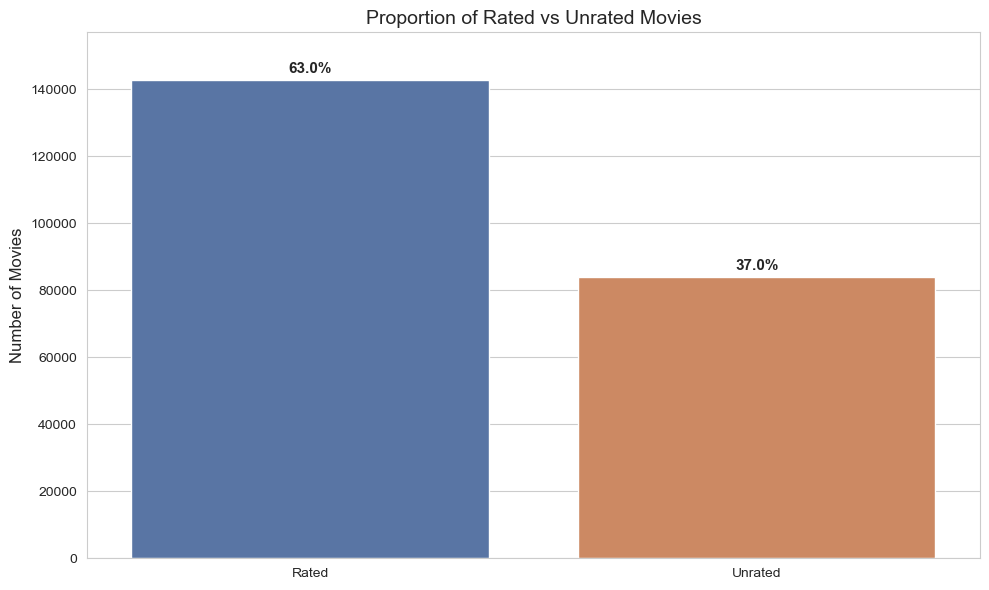

In [20]:
# Bar plot
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10,6))
    ax = sns.barplot(
        data=df_rating_status,
        x='rating_status',
        y='count',
        palette="deep"
    )
    # Add % labels above bars with spacing
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + (0.005 * total),  # adds spacing relative to total height
            f"{(height / total) * 100:.1f}%",
            ha='center', va='bottom', fontsize=11, weight= "bold"
        )
    # Titles and labels
    plt.title('Proportion of Rated vs Unrated Movies', fontsize=14)
    plt.ylabel('Number of Movies', fontsize=12)
    plt.xlabel('')

    # Add a little headroom at the top 
    plt.ylim(0, df_rating_status['count'].max() * 1.1)

    plt.tight_layout()
    plt.show()

The chart shows that 63% of movies have been rated, while 37% remain unrated, revealing a notable engagement gap. This indicates that a substantial portion of titles lack audience feedback, suggesting opportunities to improve movie discoverability or user participation.

Consequently, further analyses will focus on rating-based insights such as popularity, quality trends and benchmarking success using the rated subset. Meanwhile, the unrated subset will be analyzed separately to uncover potential visibility or engagement issues, identify unrated titles that should be promoted, and guide content strategy decisions that deliver actionable business intelligence.

As a next step, the `TMDB` dataset containing genres will now be merged with the `MUBI` movies dataset.

### 5.2 Data Enrichment (Genre Merge)

In [21]:
# Load dataset
df_tmdb = pd.read_csv('movies_dataset.csv')
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314621 entries, 0 to 1314620
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1314621 non-null  int64  
 1   title                 1314605 non-null  object 
 2   vote_average          1314621 non-null  float64
 3   vote_count            1314621 non-null  int64  
 4   status                1314621 non-null  object 
 5   release_date          1049559 non-null  object 
 6   revenue               1314621 non-null  int64  
 7   runtime               1314621 non-null  int64  
 8   adult                 1314621 non-null  bool   
 9   backdrop_path         334929 non-null   object 
 10  budget                1314621 non-null  int64  
 11  homepage              136522 non-null   object 
 12  imdb_id               644754 non-null   object 
 13  original_language     1314621 non-null  object 
 14  original_title        1314605 non-

In [22]:
# Select only essential columns from MUBI movies
query_movies = """
SELECT
    m.movie_id,       
    m.movie_title,
    m.movie_release_year,
    m.movie_popularity,
    m.director_id,
    m.director_name,
    m.rating
FROM movies AS m;
"""
df_mubi = pd.read_sql_query(query_movies, connection)

# Load and prepare TMDB dataset
df_tmdb = pd.read_csv('movies_dataset.csv')

df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'], errors="coerce")
df_tmdb['movie_release_year'] = df_tmdb['release_date'].dt.year

df_tmdb = df_tmdb.rename(columns={'title': 'movie_title', 'genres': 'genre_list'})
df_tmdb = df_tmdb[['movie_title', 'movie_release_year', 'genre_list']].drop_duplicates()

# Clean and strip titles
df_mubi['movie_title'] = df_mubi['movie_title'].str.strip()
df_tmdb['movie_title'] = df_tmdb['movie_title'].str.strip()

df_mubi['title_key'] = df_mubi['movie_title'].str.lower()
df_tmdb['title_key'] = df_tmdb['movie_title'].str.lower()

# Merge on title only for now (fuzzy year match logic)
df_merge = pd.merge(
    df_mubi,
    df_tmdb[['title_key', 'movie_release_year', 'genre_list']],
    on='title_key',
    how='left',
    suffixes=('_mubi', '_tmdb'))

# Keep MUBI year consistent
df_merge.rename(columns={'movie_release_year_mubi': 'movie_release_year'}, inplace=True)

# Compute absolute year difference
df_merge['year_diff']=(df_merge['movie_release_year']-df_merge['movie_release_year_tmdb']).abs()

# Keep the closest TMDB match per MUBI movie
df_merge = (
    df_merge.sort_values('year_diff')
    .groupby(['movie_id', 'movie_title'], as_index=False)
    .first())

# If year difference > 1, set genre to Unknown
df_merge.loc[df_merge['year_diff'] > 1, 'genre_list'] = 'Unknown'

# Handle missing genres
df_merge['genre_list'] = df_merge['genre_list'].fillna('Unknown')

# Split and explode into single genres
df_merge['movie_genre'] = df_merge['genre_list'].str.split(',')
df_final = df_merge.explode('movie_genre')

# Clean genre strings
df_final['movie_genre'] = df_final['movie_genre'].str.strip()
df_final = df_final[df_final['movie_genre'] != '']    # remove any empty strings

# Check matching rate
total_movies = len(df_merge)
matched_genres = (df_merge['genre_list'] != 'Unknown').sum()
match_rate = (matched_genres / total_movies)

# Drop all temporary columns created only for merging
df_final.drop(columns=['title_key', 'year_diff', 'movie_release_year_tmdb'], inplace=True)

print(f"Total MUBI movies attempted: {total_movies:,}")
print(f"Movies successfully matched with genre: {matched_genres:,}")
print(f"Genre match rate: {match_rate:.2%}")
print(f"Exploded movies_genres dataframe size: {len(df_final):,} rows.")

Total MUBI movies attempted: 226,575
Movies successfully matched with genre: 139,237
Genre match rate: 61.45%
Exploded movies_genres dataframe size: 335,338 rows.


Out of `226,575` MUBI movies processed, `139,237` were successfully matched with genre information, resulting in a `61.45%` match rate. Multi-genre movies were expanded into separate rows, producing a total of `335,338` `movies_genre` entries. This will enable detailed analysis at the `genre` level. This enrichment provides a solid foundation for exploring relationships between `genres`, `ratings`, and `movie success`.

In [23]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335338 entries, 0 to 226574
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movie_id            335338 non-null  int64  
 1   movie_title         335338 non-null  object 
 2   movie_release_year  335331 non-null  float64
 3   movie_popularity    335338 non-null  int64  
 4   director_id         335338 non-null  object 
 5   director_name       335332 non-null  object 
 6   rating              223592 non-null  float64
 7   genre_list          335338 non-null  object 
 8   movie_genre         335338 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 25.6+ MB


In [24]:
df_final.head()

,movie_id,movie_title,movie_release_year,movie_popularity,director_id,director_name,rating,genre_list,movie_genre
0,1,La Antena,2007.0,105,131,Esteban Sapir,3.8,Unknown,Unknown
1,2,Elementary Particles,2006.0,23,73,Oskar Roehler,2.9,Unknown,Unknown
2,3,It's Winter,2006.0,21,82,Rafi Pitts,3.4,Drama,Drama
3,4,Kirikou and the Wild Beasts,2005.0,46,"89, 90","Michel Ocelot, Bénédicte Galup",3.8,"Adventure, Animation, Family, Fantasy",Adventure
3,4,Kirikou and the Wild Beasts,2005.0,46,"89, 90","Michel Ocelot, Bénédicte Galup",3.8,"Adventure, Animation, Family, Fantasy",Animation


In [25]:
# Write df_final back as new database table
df_final.to_sql('movies_with_genres', connection, if_exists='replace', index=False)

335338

In [26]:
# Rated movies with genres with records in `ratings` table
query_rated = """
SELECT DISTINCT m.*
FROM movies_with_genres AS m
INNER JOIN ratings AS r 
    ON m.movie_id = r.movie_id;
"""
df_rated = pd.read_sql_query(query_rated, connection)

# Unrated movies with genres without records in `ratings` table
query_unrated = """
SELECT DISTINCT m.*
FROM movies_with_genres AS m
LEFT JOIN ratings AS r 
    ON m.movie_id = r.movie_id
WHERE r.movie_id IS NULL;
"""
df_unrated = pd.read_sql_query(query_unrated, connection)

# Convert `movie_release_year` to integer
df_rated['movie_release_year'] = df_rated['movie_release_year'].astype('Int64')
df_unrated['movie_release_year'] = df_unrated['movie_release_year'].astype('Int64')

# Write the dataframes back as new database tables
df_rated.to_sql('rated_movies_genres', connection, if_exists='replace', index=False)
df_unrated.to_sql('unrated_movies_genres', connection, if_exists='replace', index=False);

# Verify database tables
check_query = """
SELECT 
    (SELECT COUNT(*) FROM rated_movies_genres) AS rated_with_genres,
    (SELECT COUNT(*) FROM unrated_movies_genres) AS unrated_with_genres,
    (SELECT COUNT(*) FROM movies_with_genres) AS total_movies;
"""
pd.read_sql_query(check_query, connection)

,rated_with_genres,unrated_with_genres,total_movies
0,223693,111603,335338


At this stage, the following 5 tables are available in the database for the next rounds of the exploratory and statistical analyses: **`movies`**, **`ratings`**, **`movies_with_genres`**, and **`rated_movies_genres`** and **`unrated_movies_genres`** which are both subsets of `movies_with_genres` Each table will be queried as needed based on the analysis objective. The next step involves continuing with exploratory data analysis.

## 6. Exploratory Data Analysis Continuation

### 6.1 Genre Distribution and Performance

This section analyzes the distribution of movie genres and examines how genre relates to average user ratings and popularity. The objectives are to: determine which genres have the most movies, assess the average user rating per genre and examine the average popularity per genre. These insights help identify popular genres among MUBI users, genres that receive higher ratings, and potential trends for marketing or content acquisition strategies.

In [27]:
# Query the number of movies per genre, avg_rating and popularity
genre_counts = """
SELECT
    movie_genre,
    COUNT(DISTINCT movie_id) AS movie_count,
    AVG(rating) AS avg_rating,
    AVG(movie_popularity) AS avg_popularity
FROM rated_movies_genres
WHERE movie_genre != 'Unknown'
GROUP BY
    movie_genre
ORDER BY
    movie_count DESC; 
"""
df_genre_counts = pd.read_sql_query(genre_counts, connection)

In [28]:
df_genre_counts.head(10)

,movie_genre,movie_count,avg_rating,avg_popularity
0,Drama,45765,3.049821,40.153611
1,Comedy,24018,2.843578,23.314681
2,Documentary,14509,3.371961,9.620511
3,Romance,12106,2.906304,38.755576
4,Thriller,11472,2.657103,42.710861
5,Action,8728,2.607522,25.100710
6,Horror,8721,2.543069,21.997019
7,Crime,7848,2.888594,56.036570
8,Animation,7572,3.134500,20.009377
9,Adventure,5211,2.699712,41.504702


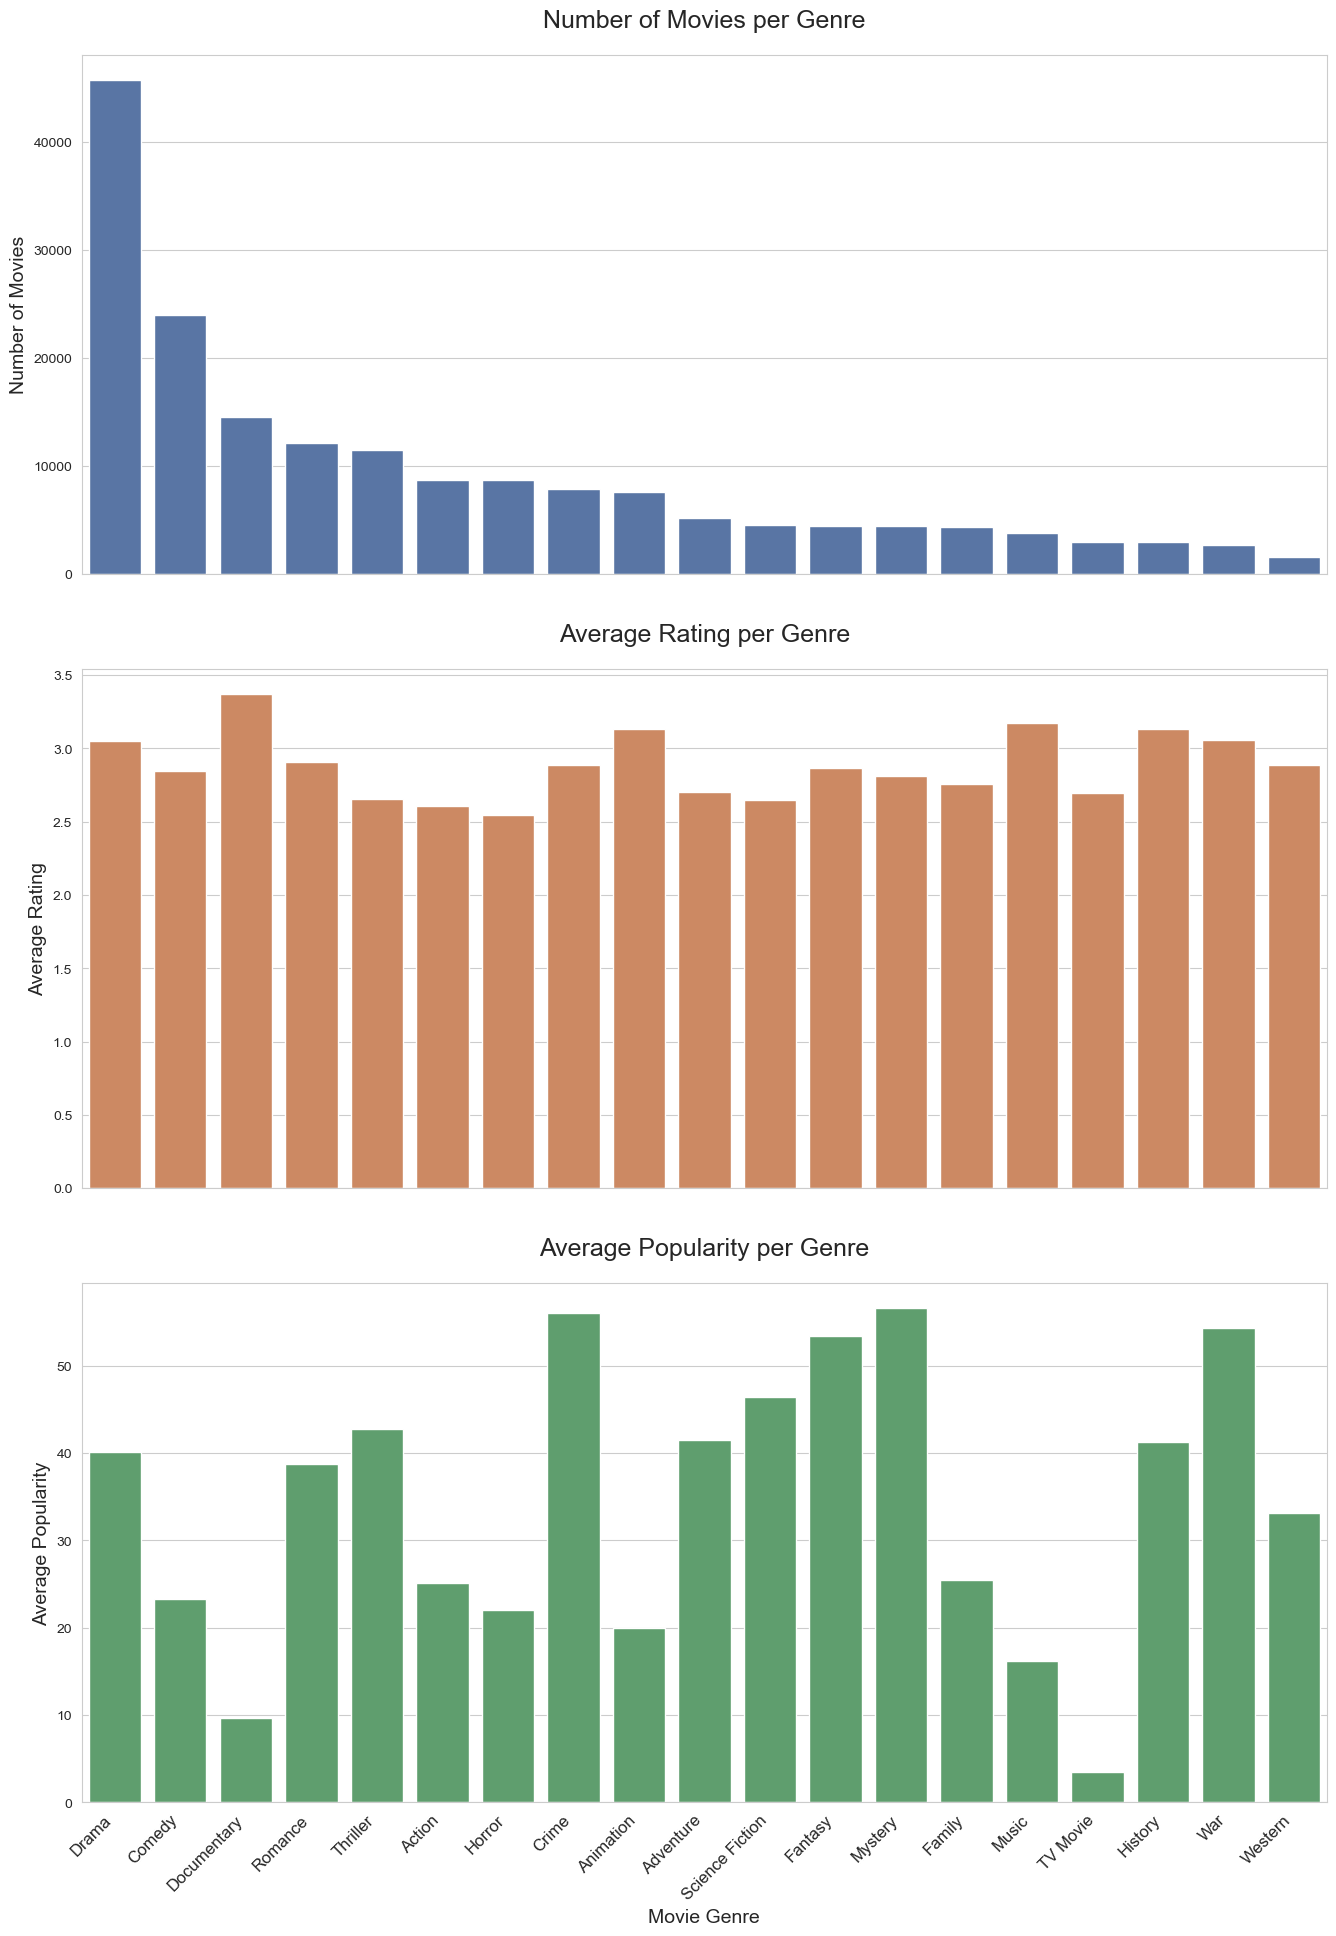

In [29]:
with sns.axes_style("whitegrid"):
    # Sort genres by movie count
    df_genre_counts_sorted = df_genre_counts.sort_values("movie_count", ascending=False)

    # Color palette
    colors = sns.color_palette("deep")

    # Create vertical bar plots with shared x-axis
    fig, axes = plt.subplots(3, 1, figsize=(14, 20), sharex=True)

    # Movie count
    sns.barplot(data=df_genre_counts_sorted, x="movie_genre", y="movie_count", ax=axes[0], color=colors[0])
    axes[0].set_title("Number of Movies per Genre", fontsize=18, pad=20)
    axes[0].set_ylabel("Number of Movies", fontsize=14)

    # Average rating
    sns.barplot(data=df_genre_counts_sorted, x="movie_genre", y="avg_rating", ax=axes[1], color=colors[1])
    axes[1].set_title("Average Rating per Genre", fontsize=18, pad=20)
    axes[1].set_ylabel("Average Rating", fontsize=14)

    # Average popularity
    sns.barplot(data=df_genre_counts_sorted, x="movie_genre", y="avg_popularity", ax=axes[2], color=colors[2])
    axes[2].set_title("Average Popularity per Genre", fontsize=18, pad=20)
    axes[2].set_xlabel("Movie Genre", fontsize=14)
    axes[2].set_ylabel("Average Popularity", fontsize=14)

    plt.xticks(rotation=45, ha="right", fontsize=12)
    plt.tight_layout(pad=3.0)
    plt.show()

The above plots reveal some interesting insights. Even though `Drama`(`~46,000`), `Comedy`(`~24,000`) and `Documentary`(`~15,000`) record the highest number of movies, they didn't achieve the highest average rating and popularity. Documentary's high rating but moderate popularity suggests critical acclaim doesn't always translate to widespread viewership.

Ratings are relatively consistent across genres, with values ranging between **2.5 and 3.3 out of 5.** `Documentary` has a slight edge as the highest-rated genre, while `Horror` appears lowest. The narrow variation (around one rating point) suggests that genre may not be a strong predictor of quality among MUBI audiences.

Popularity varies more dramatically than ratings. Genres like `Mystery`, `Crime`, `War` and `Fantasy` show relatively high average popularity, suggesting they might have more dedicated and engaged audiences. In contrast, niche genres with fewer movies like `TV Movie` and `Music` have very low average popularity, highlighting a potential opportunity for targeted promotion or investment in underrepresented but high-rated genres.

This analysis provides a foundation for deeper investigation into correlations between `genre`, `rating`, and `success` metrics for marketing and investment decisions.

### 6.2 Cross-Sectional Genre Analysis by Volume, Rating and Popularity

### 6.2.1 Rating Distribution

To understand audience preferences, movies are segmented into rating categories: `Low (< 2.5)`, `Medium: (2.5-3.0)`, `High (> 3.0)`.

In [30]:
# query to count the number of movies in each rating category
query_rating_binning = """
SELECT
    CASE
        WHEN rating > 3.0 THEN "High"
        WHEN rating BETWEEN 2.5 AND 3.0 THEN "Medium"
        ELSE "Low"
    END AS rating_category,
    COUNT(DISTINCT movie_id) AS movie_count
FROM rated_movies_genres
GROUP BY rating_category
ORDER BY movie_count DESC;
"""
# run the query
df_rating_binning = pd.read_sql_query(query_rating_binning, connection)

In [31]:
# print results
df_rating_binning

,rating_category,movie_count
0,High,65910
1,Medium,42894
2,Low,33860


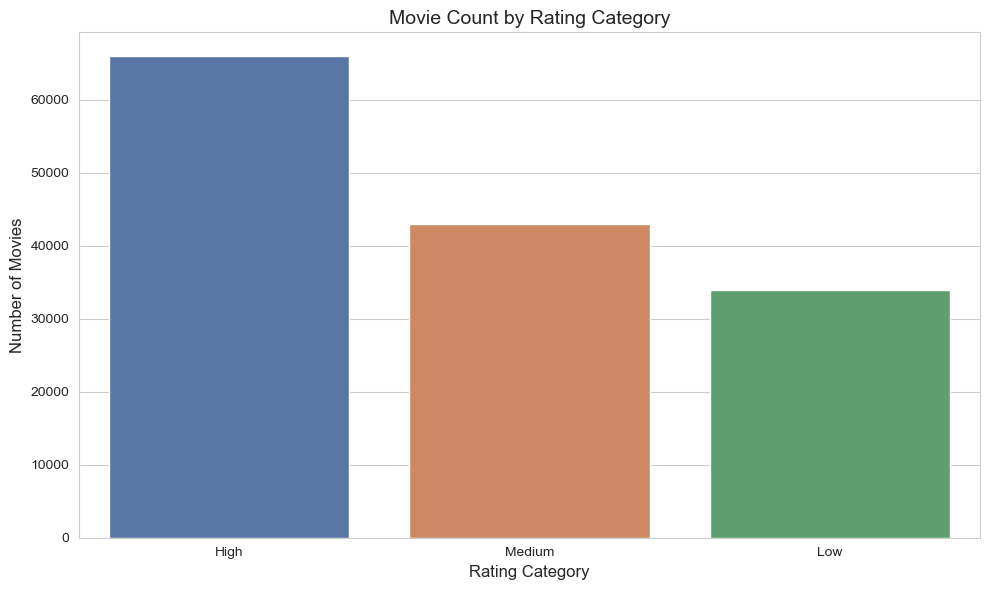

In [32]:
# Plot a barplot of rating_category vs. movie_count
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10,6))

    sns.barplot(
        data=df_rating_binning.sort_values("movie_count", ascending=False),
        x='rating_category',
        y='movie_count',
        palette='deep')

    plt.title('Movie Count by Rating Category', fontsize=14)
    plt.xlabel('Rating Category', fontsize=12)
    plt.ylabel('Number of Movies', fontsize=12)
    plt.tight_layout()
    plt.show()

The distribution reveals that the majority of movies (65,910) fall into the `High` rating category (>3.0), followed by `Medium` (42,894) and `Low` (33,860). This indicates that MUBI's catalog skews toward well-rated content, reflecting strong curation standards or audience self-selection toward quality films.

### 6.2.2 Popularity Distribution

In [33]:
query_popularity_binning = """
SELECT
    CASE
        WHEN movie_popularity > 40 THEN "High"
        WHEN movie_popularity BETWEEN 20 AND 40 THEN "Medium"
        ELSE "Low"
    END AS popularity_category,
    COUNT(DISTINCT movie_id) AS movie_count
FROM rated_movies_genres
GROUP BY popularity_category
ORDER BY movie_count DESC;
"""
df_popularity_binning = pd.read_sql_query(query_popularity_binning, connection)

In [34]:
df_popularity_binning

,popularity_category,movie_count
0,Low,132115
1,High,6850
2,Medium,3699


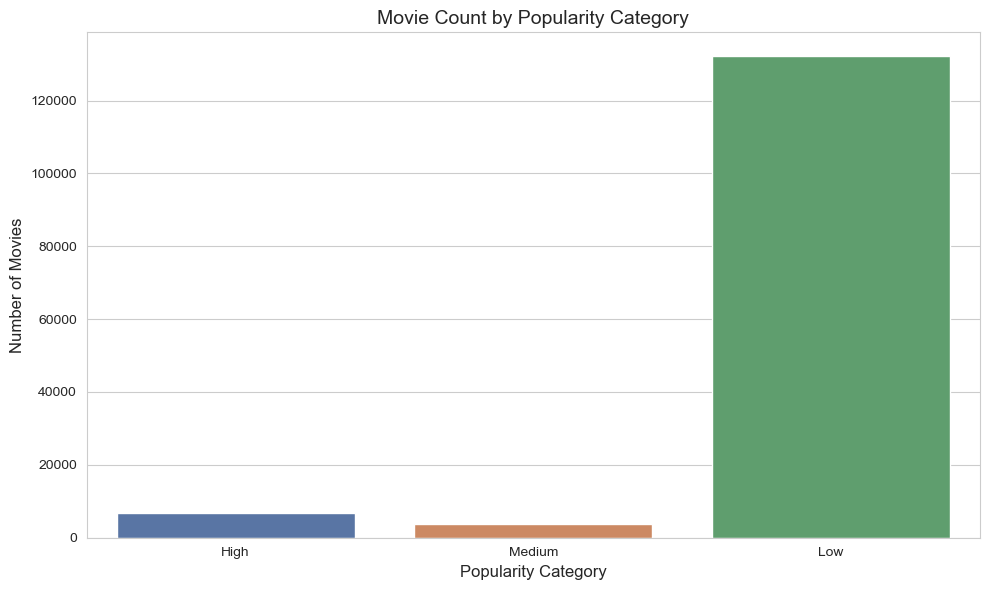

In [35]:
# Plot a barplot of popularity_category vs. movie_count
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10,6))
    
    # Define order
    category_order = ['High', 'Medium', 'Low']

    sns.barplot(
        data=df_popularity_binning,
        x='popularity_category',
        y='movie_count',
        order=category_order,
        palette='deep')

    plt.title('Movie Count by Popularity Category', fontsize=14)
    plt.xlabel('Popularity Category', fontsize=12)
    plt.ylabel('Number of Movies', fontsize=12)
    plt.tight_layout()
    plt.show()

The popularity distribution shows extreme concentration in the Low category (132,115 movies), with only 6,850 High-popularity and 3,699 Medium-popularity titles. Since popularity measures the number of users who "love" a movie, this reveals that the vast majority of MUBI films have limited audience engagement, suggesting opportunities to improve discoverability for quality content currently underexposed.

### 6.2.3 Genre-Level Performance Overview

To better understand MUBI's movie landscape, we will analyze key statistics at the genre level, focusing on three dimensions: volume (movie counts), quality (average rating) and reach (popularity).

This analysis aims to uncover patterns such as:  
- High-quality but underexposed genres, representing potential marketing opportunities.  
- Mainstream genres with high volume but moderate ratings, suggesting market saturation.  
- Genres that balance quality and popularity, highlighting strong investment potential.

The results will be visualized using a bubble chart to compare genres by `popularity`, `rating`, and `movie volume` (bubble size), providing actionable insights for strategic decision-making.

In [36]:
query_genre_stats = """
SELECT
    movie_genre,
    COUNT(DISTINCT movie_id) AS movie_count,
    ROUND(AVG(rating), 2) AS avg_rating,
    ROUND(AVG(movie_popularity), 2) AS avg_popularity
FROM rated_movies_genres
WHERE movie_genre != 'Unknown'
GROUP BY movie_genre
ORDER BY movie_count DESC, avg_rating DESC;
"""
df_genre_stats = pd.read_sql_query(query_genre_stats, connection)

In [37]:
df_genre_stats.head()

,movie_genre,movie_count,avg_rating,avg_popularity
0,Drama,45765,3.05,40.15
1,Comedy,24018,2.84,23.31
2,Documentary,14509,3.37,9.62
3,Romance,12106,2.91,38.76
4,Thriller,11472,2.66,42.71


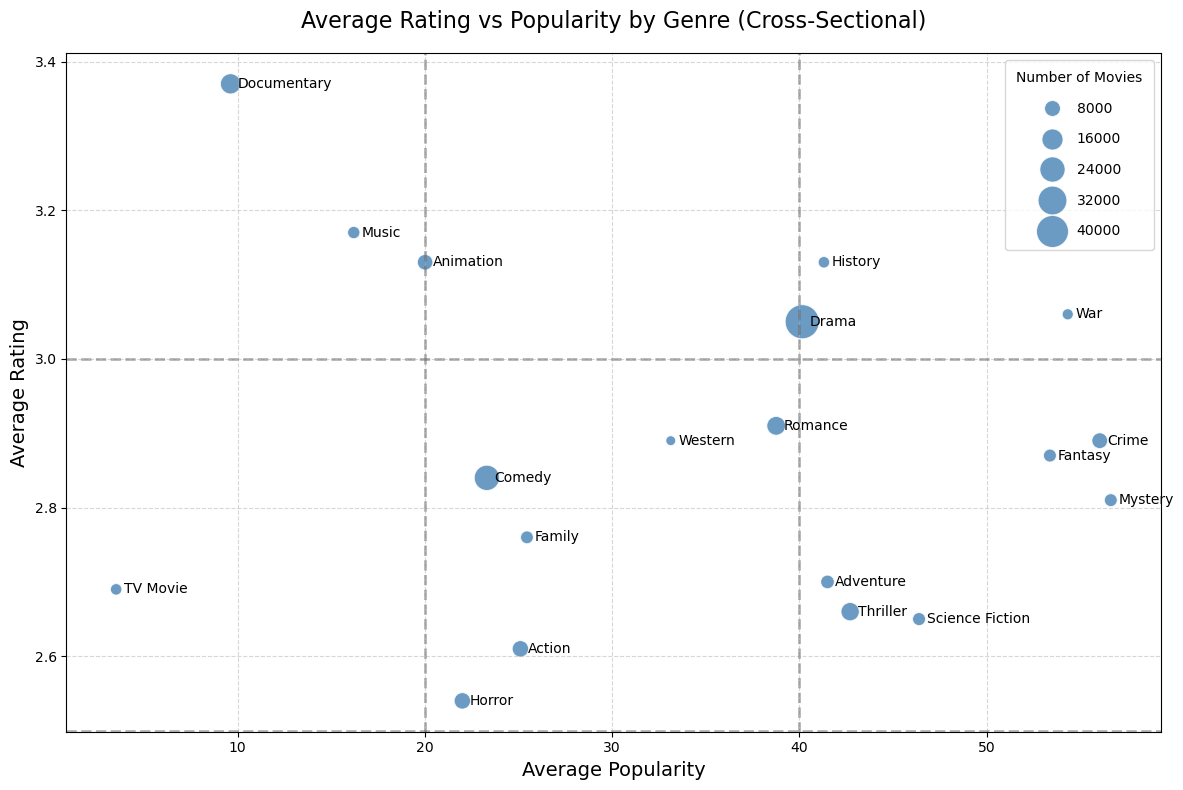

In [38]:
plt.figure(figsize=(12,8))

# Scatter plot
scatter = sns.scatterplot(
    data=df_genre_stats,
    x='avg_popularity',
    y='avg_rating',
    size='movie_count',
    sizes=(50, 600),
    color='steelblue',
    alpha=0.8,
    legend='brief')

# Add genre labels beside bubbles
for _, row in df_genre_stats.iterrows():
    plt.text(
        row['avg_popularity'] + 0.4,
        row['avg_rating'],
        row['movie_genre'],
        fontsize=10,
        ha='left',
        va='center',
        color='black')
    
# Rating cutoff lines
plt.axhline(y=3.0, color='dimgray', linestyle='--', linewidth=2, alpha=0.5)
plt.axhline(y=2.5, color='dimgray', linestyle='--', linewidth=2, alpha=0.5)

# Popularity cutoff lines
plt.axvline(x=40, color='dimgray', linestyle='--', linewidth=2, alpha=0.5)
plt.axvline(x=20, color='dimgray', linestyle='--', linewidth=2, alpha=0.5)

# Bubble-size legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=labels,
    title='Number of Movies',
    loc='upper right',
    labelspacing=1.2,
    borderpad=0.8)

# Titles and axes
plt.title('Average Rating vs Popularity by Genre (Cross-Sectional)', fontsize=16, pad=18)
plt.xlabel('Average Popularity', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

This bubble chart reveals distinct positioning patterns across MUBI's genres. **Documentary** (3.37 rating, 9.62 popularity) shows the highest rating but with limited visibility. **Music** (3.17) and **Animation** (3.13) follow a similar pattern, achieving strong quality with moderate reach. **History** (3.13) and **War** (3.06) have high ratings with broader appeal

Mainstream genres behave differently: **Drama** (3.05, 40.15 popularity) demonstrates solid quality at massive scale (45,765 movies) while **Comedy** (2.85) achieves moderate ratings despite substantial volume.
**Horror** (2.54), **Action** (2.61) and **Thriller** (2.66) exhibit consistently lower ratings despite moderate production volumes, posing quality concern issues.

Overall, the chart suggests interesting patterns in genre positioning. Niche genres like **Documentary**, **Music**, and **Animation** achieve strong ratings, while some high-volume genres show quality challenges. However, **Drama** demonstrates that high production volume can coexist with solid ratings, indicating the relationship between scale and quality may be genre-specific rather than universal. Visual inspection alone cannot confirm whether these patterns are statistically meaningful or represent systematic relationships.

**Note:** Statistical validation of these visual patterns is conducted in Section 7, where formal tests examine whether production volume systematically correlates with genre quality.

### 6.3 Temporal Genre Analysis by Volume, Ratings, and Popularity

The bubble chart provides a high-level snapshot of how genres perform overall in terms of rating quality, popularity, and production volume. However, this static view does not show how these patterns emerged, evolved, or intensified over time.

To understand the dynamics behind these relationships, we now examine how the top genres have changed across 5-year periods from **1990 to 2021.** This binning approach aims to smooth out short-term fluctuations and highlights broader trends in genre performance and audience preferences over time.

**Data Note:** The final period **(2020-2021)** shows substantially reduced volume, likely reflecting incomplete data rather than genuine market collapse. This is addressed in the analysis below.

By comparing these dimensions, we can observe how different genres have grown, declined, or stabilized in both production and reception over the past three decades.

In [39]:
# Query the average rating and popularity by genre and release year
query_genre_years = """
SELECT
    movie_genre,
    movie_release_year,
    COUNT(DISTINCT movie_id) AS movie_count,
    AVG(rating) AS avg_rating,
    AVG(movie_popularity) AS avg_popularity
FROM rated_movies_genres
WHERE 
    movie_release_year IS NOT NULL AND
    movie_genre != 'Unknown' AND 
    movie_release_year >= 1990
GROUP BY movie_genre, movie_release_year
ORDER BY movie_genre, movie_release_year DESC;
"""
df_genre_years = pd.read_sql_query(query_genre_years, connection)

In [40]:
df_genre_years.head()

,movie_genre,movie_release_year,movie_count,avg_rating,avg_popularity
0,Action,2021,2,2.000000,0.000000
1,Action,2020,38,2.352632,0.026316
2,Action,2019,183,2.603279,2.142077
3,Action,2018,235,2.479149,5.348936
4,Action,2017,255,2.622745,8.270588


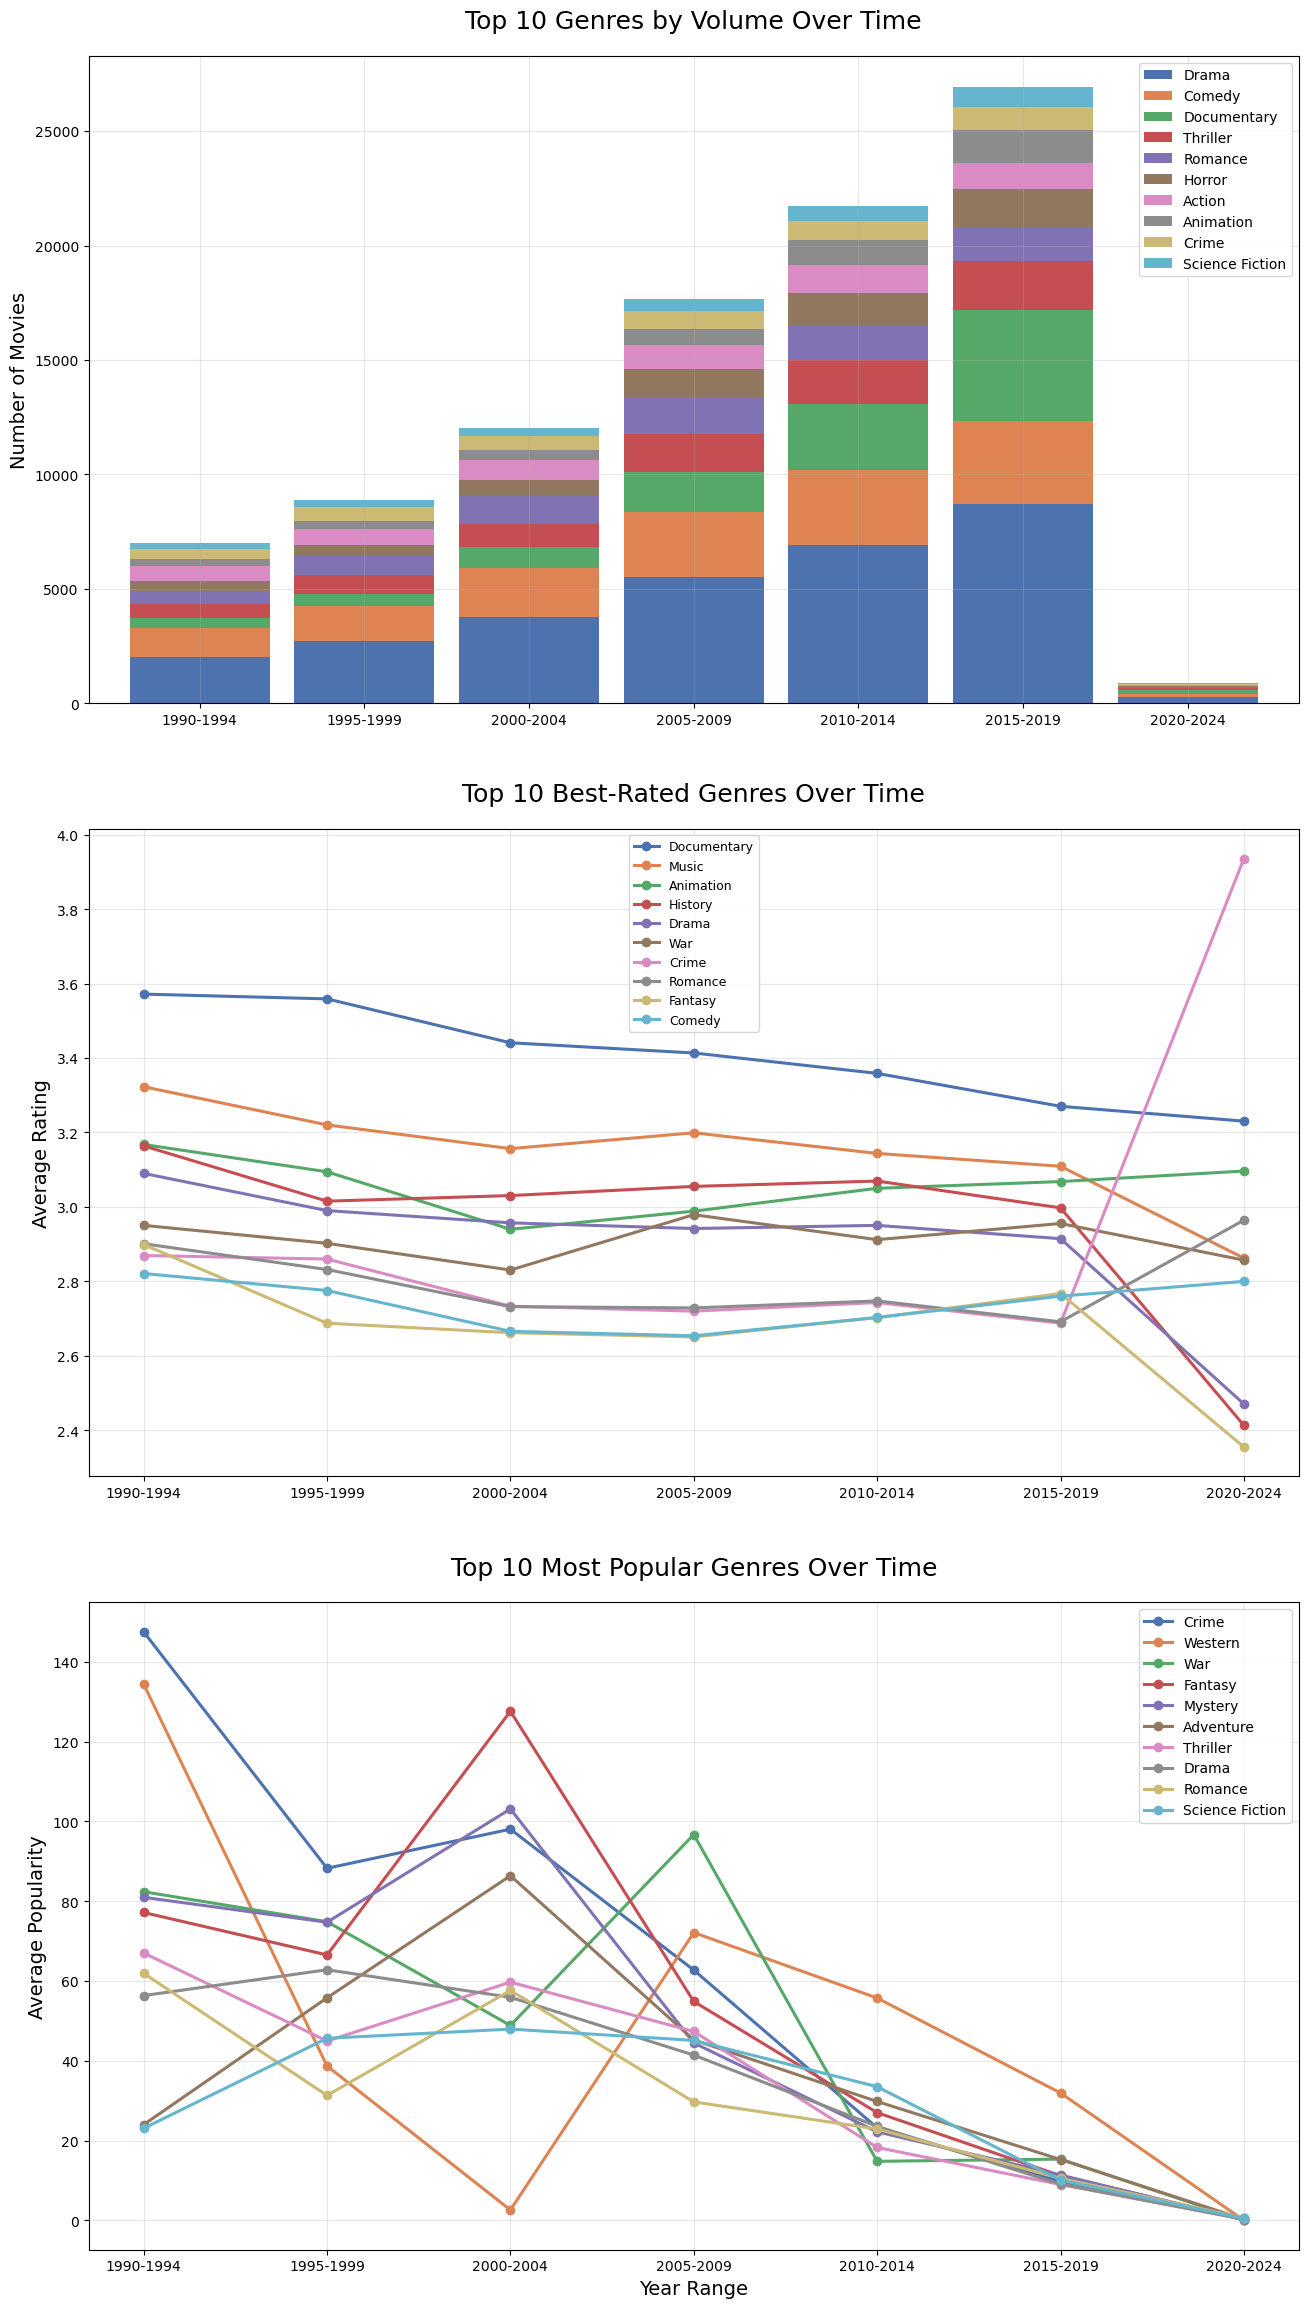

In [41]:
# Create copy
df = df_genre_years.copy()

# Create 5-year bins
df['Five_Year_Bin'] = (df['movie_release_year'] // 5 * 5).astype(int)

# Filter out very small genres
MIN_MOVIES = 10
total_by_genre = df.groupby('movie_genre')['movie_count'].sum()
df = df[df['movie_genre'].isin(total_by_genre[total_by_genre >= MIN_MOVIES].index)]

# Ensure consistent year order
all_bins = sorted(df['Five_Year_Bin'].unique())

# Create year range labels
bin_labels = [f'{year}-{year+4}' for year in all_bins]

# Set color palette
colors = sns.color_palette("deep")

# Create figure for plotting
fig, axes = plt.subplots(3, 1, figsize=(14, 24))

# Plot 1:  Top 10 Genres by volume 
top_volume = (df.groupby('movie_genre')['movie_count'].sum().nlargest(10).index)

volume_pivot = (
    df[df['movie_genre'].isin(top_volume)]
    .pivot_table(
        index='Five_Year_Bin',
        columns='movie_genre',
        values='movie_count',
        aggfunc='sum',
        fill_value=0).reindex(all_bins).loc[:, top_volume])

volume_pivot.plot(kind='bar', stacked=True, ax=axes[0], width=0.85, color=colors)
axes[0].set_title('Top 10 Genres by Volume Over Time', fontsize=18, pad=20)
axes[0].set_xlabel('')
axes[0].set_ylabel('Number of Movies', fontsize=14)
axes[0].set_xticklabels(bin_labels, rotation=0)
axes[0].legend(loc='upper right', fontsize=10)
axes[0].grid(True, alpha=0.3)

# Plot 2: Top 10 Best-Rated Genres
top_rating = (
    df.groupby('movie_genre')
    .apply(lambda g: np.average(g['avg_rating'], weights=g['movie_count'])
           if g['movie_count'].sum() > 0 else np.nan)
    .dropna()
    .nlargest(10)
    .index)

rating_pivot = (
    df[df['movie_genre'].isin(top_rating)]
    .pivot_table(
        index='Five_Year_Bin',
        columns='movie_genre',
        values='avg_rating',
        aggfunc='mean').reindex(all_bins).loc[:, top_rating])

rating_pivot.plot(ax=axes[1], marker='o', linewidth=2.2, color=colors)
axes[1].set_title('Top 10 Best-Rated Genres Over Time', fontsize=18, pad=20)
axes[1].set_xlabel('')
axes[1].set_ylabel('Average Rating', fontsize=14)
axes[1].set_xticks(all_bins)
axes[1].set_xticklabels(bin_labels, rotation=0)
axes[1].legend(loc='upper center',fontsize=9)
axes[1].grid(True, alpha=0.3)

# Plot 3: Top 10 Most Popular Genres
top_popularity = (
    df.groupby('movie_genre')
    .apply(lambda g: np.average(g['avg_popularity'], weights=g['movie_count'])
           if g['movie_count'].sum() > 0 else np.nan)
    .dropna()
    .nlargest(10)
    .index)

popularity_pivot = (
    df[df['movie_genre'].isin(top_popularity)]
    .pivot_table(
        index='Five_Year_Bin',
        columns='movie_genre',
        values='avg_popularity',
        aggfunc='mean').reindex(all_bins).loc[:, top_popularity])

popularity_pivot.plot(ax=axes[2], marker='o', linewidth=2.2, color=colors)
axes[2].set_title('Top 10 Most Popular Genres Over Time', fontsize=18, pad=20)
axes[2].set_xlabel('Year Range', fontsize=14)
axes[2].set_ylabel('Average Popularity', fontsize=14)
axes[2].set_xticks(all_bins)
axes[2].set_xticklabels(bin_labels, rotation=0)
axes[2].legend(fontsize=10)
axes[2].grid(True, alpha=0.3)

plt.tight_layout(pad=4.0)
plt.show()

**Production Trends:**
The temporal analysis reveals dramatic growth from 1990-2019, with total production peaking at ~27,000 movies in 2015-2019 before collapsing 95% to under 1,000 in 2020-2024. This discontinuity likely reflects incomplete data, COVID-19 disruption, or platform transitions rather than genuine market trends. **To avoid bias from this under-represented period, all formal trend and regression tests in Section 5.2 exclude or treat it separately.**

**Genre Dominance:**
**Drama** and **Comedy** dominate output across all periods, jointly accounting for 45-50% of total production. Both genres show substantial volume growth through 2015-2019, with Drama scaling from `~2,000` (1990-1994) to `~8,700` (2015-2019) — a 4.3x increase. Visual inspection suggests that both genres maintained relatively stable ratings (~2.9-3.1 for Drama, ~2.7-2.8 for Comedy) across 1990-2019 despite substantial volume growth.

**High-Quality Niche Genres:**
**Documentary**, **Music**, and **Animation** consistently achieve the highest ratings across all time periods (3.1-3.6 range). However, **Documentary** shows evidence of quality decline from **3.57** to **3.27** as production scaled 11-fold (see Section 7.2.4), suggesting that excessive expansion may compromise the curatorial standards that drive high ratings. Music and Animation, maintaining lower volumes, sustain consistently high quality.

**Genre-Specific Patterns:**

- **Western** shows clear declining trajectory from ~135 (1990-1994) to ~31 (2015-2019), approaching near-zero by 2020-2024.
- **Crime** demonstrates a pronounced decline from the highest popularity peak on the chart (~148) in 1990-1994 and trending consistently downward to ~15 in 2015-2019.
- **Fantasy and Romance** exhibit volatility: Fantasy spikes to 128 (2000-2004) before crashing to ~30 (2010-2014); Romance shows erratic fluctuations between 30-60 throughout the period.
- **War** was initially stable at 80-83 (1990-1999), peaked at 97 (2005-2009), then declined.

**Note:** Statistical validation of these visual patterns is provided in Section 7.2, where formal tests examine trend significance, genre stability, and volatility measures to determine which observations reflect statistically meaningful relationships.

### 6.4 User Engagement and Community Quality

This section examines two dimensions of deeper audience engagement beyond ratings:

1. **Critique Volume**: How actively users discuss content (total critiques per genre)
2. **Engagement Quality**: How valuable the community finds those discussions (average likes per critique)

Users who write critiques demonstrate deeper investment than passive viewers. Analyzing these metrics across genres (1990-2019) reveals which categories cultivate active discussion communities and inspire meaningful engagement — critical insights for community management and content curation strategy.

**Methodological Note on Multi-Genre Attribution:**

Since 52% of movies in the dataset have multiple genres (with an average of 2.3 genres per movie), all critique and engagement metrics are **weighted by the number of genres** each movie belongs to. Without this adjustment, a single critique for a Drama-Thriller-Crime film would be counted three times — once under each genre — inflating totals by 132%.

This weighting ensures accurate genre comparisons while preserving the contribution of multi-genre films to each of their categories.

In [42]:
# Total critiques, likes, and comments per genre
query_critiques_per_genre_weighted = """
WITH movie_genre_counts AS (
    SELECT movie_id, COUNT(DISTINCT movie_genre) AS num_genres
    FROM rated_movies_genres
    WHERE movie_genre != 'Unknown'
    GROUP BY movie_id
)
SELECT
    rmg.movie_genre,
    COUNT(DISTINCT rmg.movie_id) AS movie_count,
    ROUND(SUM(1.0 / mgc.num_genres), 0) AS total_ratings,
    ROUND(SUM(CASE WHEN r.critique IS NOT NULL AND r.critique != 'None' THEN 1.0 / mgc.num_genres ELSE 0 END), 0) AS total_critiques,
    ROUND(SUM(CASE WHEN r.critique IS NOT NULL AND r.critique != 'None' THEN r.critique_likes / mgc.num_genres ELSE 0 END), 0) AS total_critique_likes,
    ROUND(SUM(CASE WHEN r.critique IS NOT NULL AND r.critique != 'None' THEN r.critique_comments / mgc.num_genres ELSE 0 END), 0) AS total_critique_comments,
    ROUND(AVG(CASE WHEN r.critique IS NOT NULL AND r.critique != 'None' THEN r.critique_likes ELSE NULL END), 2) AS avg_likes_per_critique
FROM rated_movies_genres rmg
INNER JOIN ratings r ON rmg.movie_id = r.movie_id
INNER JOIN movie_genre_counts mgc ON rmg.movie_id = mgc.movie_id
WHERE rmg.movie_genre != 'Unknown' AND rmg.movie_release_year >= 1990
GROUP BY rmg.movie_genre
ORDER BY total_critiques DESC;
"""
df_critiques_genre = pd.read_sql_query(query_critiques_per_genre_weighted, connection)

In [43]:
df_critiques_genre.head(12)

,movie_genre,movie_count,total_ratings,total_critiques,total_critique_likes,total_critique_comments,avg_likes_per_critique
0,Drama,29869,3188439.0,160723.0,99821.0,10366.0,0.79
1,Comedy,14838,1062494.0,51426.0,20131.0,1917.0,0.63
2,Thriller,8259,716905.0,35217.0,13923.0,1341.0,0.74
3,Documentary,11530,459558.0,32852.0,23778.0,2598.0,0.75
4,Romance,7345,650358.0,29576.0,13045.0,1338.0,0.74
5,Crime,4307,594919.0,22278.0,8886.0,805.0,0.73
6,Action,5727,435844.0,21232.0,6345.0,712.0,0.65
7,Horror,5880,277043.0,19609.0,9318.0,1003.0,0.79
8,Science Fiction,3023,286117.0,16231.0,6943.0,697.0,0.76
9,Adventure,2918,323751.0,15611.0,4585.0,487.0,0.66


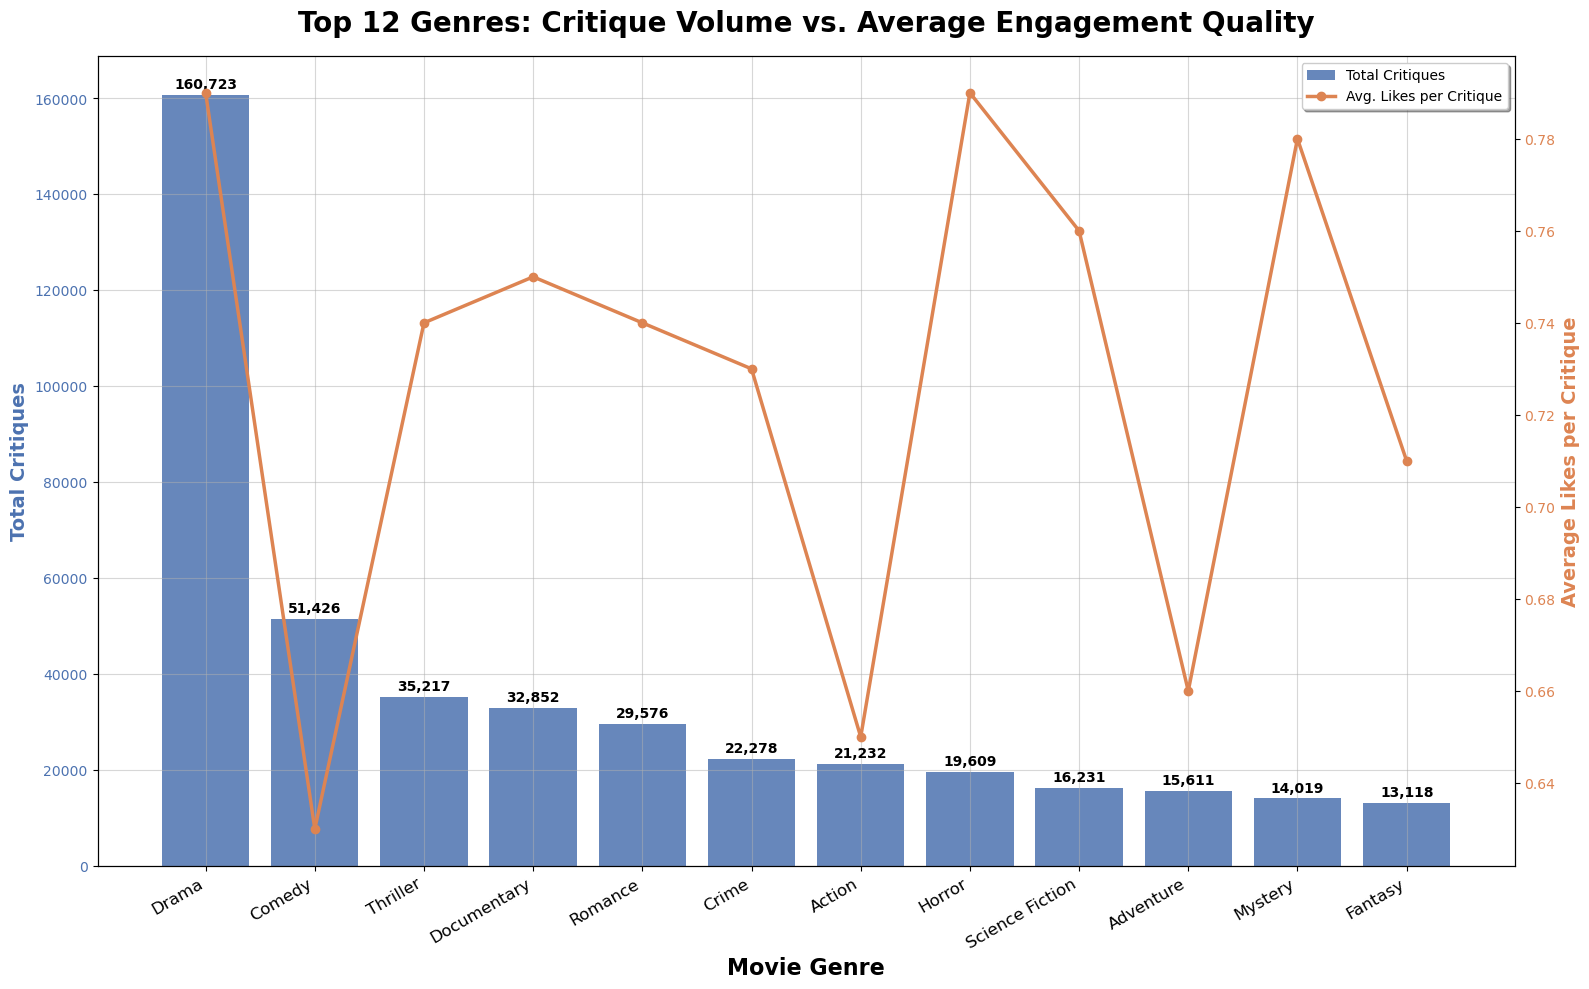

In [44]:
df_plot_critiques = df_critiques_genre.nlargest(12, 'total_critiques')

# Plot setup
colors = sns.color_palette("deep")
fig, ax1 = plt.subplots(figsize=(16,10))

# Plot 1: Total critiques (left axis)
bars = ax1.bar(
    df_plot_critiques['movie_genre'],
    df_plot_critiques['total_critiques'],
    color=colors[0],
    alpha=0.85,
    label='Total Critiques'
)
ax1.set_xlabel('Movie Genre', fontsize=16, fontweight='bold')
ax1.set_ylabel('Total Critiques', color=colors[0], fontsize=14, fontweight='bold')
ax1.tick_params(axis='y', labelcolor=colors[0])
ax1.grid(True, alpha=0.5)
plt.xticks(rotation=30, ha='right', fontsize=12)

# Add value labels on bars
for i, row in enumerate(df_plot_critiques.itertuples()):
    ax1.text(i, row.total_critiques + (df_plot_critiques['total_critiques'].max() * 0.005),
             f"{int(row.total_critiques):,}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 2: Avg Likes per Critique (Engagement Quality, right axis)
ax2 = ax1.twinx()
ax2.plot(
    df_plot_critiques['movie_genre'],
    df_plot_critiques['avg_likes_per_critique'],
    color=colors[1],
    marker='o',
    linewidth=2.5,
    label='Avg. Likes per Critique')

ax2.set_ylabel('Average Likes per Critique', color=colors[1], fontsize=14, fontweight='bold')
ax2.tick_params(axis='y', labelcolor=colors[1])

# Title & Legend
plt.title(
    'Top 12 Genres: Critique Volume vs. Average Engagement Quality',
    fontsize=20,
    fontweight='bold',
    pad=18)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right', fontsize=10, shadow=True)

plt.tight_layout()
plt.show()

The critique engagement analysis reveals a complex relationship between discussion volume and engagement quality across genres, showing **no universal inverse relationship between scale and quality**. **Drama** achieves the highest critique volume (160,723) and shares the **highest engagement quality (0.79 average likes per critique)**, proving that scale does not inherently degrade quality. 

Conversely, **Comedy**, despite ranking second in volume (51,426), presents a major anomaly by showing the **lowest engagement quality (0.63 likes per critique)**, suggesting issues with content reception or critique substance. Specialized niches like **Horror** (19,609 critiques, 0.79 likes) and **Mystery** (14,019 critiques, 0.78 likes) match Drama's high engagement quality with significantly lower volume, highlighting the success of highly passionate communities. Other substantial genres like **Documentary** (32,852 critiques, 0.75 likes), **Thriller**, and **Romance** maintain a solid balance of volume and quality.

This variation suggests that **genre identity, content appeal, and community culture** are the primary drivers of engagement, requiring differentiated strategies: maintaining Drama's success, investigating the Comedy gap, and leveraging the passion of the high-quality niche communities.

## 7. Statistical and Regression Analysis

Following exploratory visualization in Section 6, this section rigorously tests key hypotheses using correlation analysis, regression modeling, and group comparisons.

### 7.1 Cross-Sectional Analysis: Production Volume vs. Quality

The goal here is to determine if production volume systematically correlates with content quality across genres.

Section 6.2 visual analysis suggested potential patterns where niche, lower-volume genres appeared to achieve higher ratings than some high-volume genres. However, Drama demonstrated that high volume can coexist with solid quality (3.05 rating, 45,765 films), indicating the relationship may not be straightforward. Statistical testing is required to determine whether any volume-quality relationship exists beyond visual clustering.

**Hypotheses:**

- Null Hypothesis ($H_0$): No systematic relationship exists between production volume and average rating across genres
- Alternative Hypothesis ( $H_1$): Low-volume genres achieve significantly higher average ratings than high-volume genres

### 7.1.1 Correlation Analysis

The approach here will employ Pearson and Spearman correlation to test linear and monotonic relationships between movie count (volume) and average rating (quality).

**Data:** Query generates `df_genre_corr` with genre-level aggregates (movie count, avg rating, avg popularity) for 19 genres.

In [45]:
query_genre_corr = """
SELECT
    movie_genre,
    COUNT(DISTINCT movie_id) AS movie_count,
    ROUND(AVG(rating), 2) AS avg_rating,
    ROUND(AVG(movie_popularity), 2) AS avg_popularity
FROM rated_movies_genres
WHERE movie_genre != 'Unknown'
GROUP BY movie_genre
ORDER BY avg_rating DESC;
"""
df_genre_corr = pd.read_sql_query(query_genre_corr, connection)

In [46]:
df_genre_corr.head()

,movie_genre,movie_count,avg_rating,avg_popularity
0,Documentary,14509,3.37,9.62
1,Music,3842,3.17,16.20
2,History,3003,3.13,41.31
3,Animation,7572,3.13,20.01
4,War,2669,3.06,54.33


In [47]:
# Pearson Correlation test (assumes linear relationship)
genre_correlations = df_genre_corr[['movie_count', 'avg_rating', 'avg_popularity']].corr()
genre_correlations

,movie_count,avg_rating,avg_popularity
movie_count,1.000000,0.175458,-0.053576
avg_rating,0.175458,1.000000,-0.122720
avg_popularity,-0.053576,-0.122720,1.000000


In [48]:
# Correlations tests
correlations = [
    ('Volume vs Rating', 'Pearson', *pearsonr(df_genre_corr['movie_count'], df_genre_corr['avg_rating'])),
    ('Volume vs Rating', 'Spearman', *spearmanr(df_genre_corr['movie_count'], df_genre_corr['avg_rating'])),
    ('Popularity vs Rating', 'Pearson', *pearsonr(df_genre_corr['avg_popularity'], df_genre_corr['avg_rating']))
]
# Create dataFrame
df_corr_results = pd.DataFrame(correlations, columns=['Variables', 'Test', 'r', 'p-value'])
df_corr_results['Significant'] = df_corr_results['p-value'] < 0.05

display(df_corr_results)

,Variables,Test,r,p-value,Significant
0,Volume vs Rating,Pearson,0.175458,0.472458,False
1,Volume vs Rating,Spearman,-0.095698,0.696747,False
2,Popularity vs Rating,Pearson,-0.122720,0.616717,False


The results show that no statistically significant correlations are detected (all p > 0.05). The weak positive Pearson coefficient (r = 0.175) contradicts the expected inverse relationship, while Spearman reveals essentially no monotonic association. The correlation matrix confirms these findings, showing minimal relationships between volume, rating, and popularity (all |r| < 0.18).

Production volume does not systematically predict quality across genres. The visual clustering observed in Section 6.2.3 reflects genre-specific characteristics rather than a universal volume-quality relationship.  **Documentary achieves high ratings (3.37) despite substantial volume (14,509 films), while Action shows lower ratings (2.61) with moderate volume (8,728 films), confirming that performance is genre-dependent.**

### 7.1.2 Regression Analysis

In [49]:
# Simple linear regression: Rating ~ Movie Count (Volume)
Y = df_genre_corr['avg_rating']
X = sm.add_constant(df_genre_corr['movie_count'])
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             avg_rating   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.5400
Date:                Thu, 20 Nov 2025   Prob (F-statistic):              0.472
Time:                        09:49:48   Log-Likelihood:                 2.4069
No. Observations:                  19   AIC:                           -0.8138
Df Residuals:                      17   BIC:                             1.075
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.8451      0.071     40.244      

The regression results indicate that production volume has virtually no predictive power for genre quality. The model explains only `3.1%` of the variance in ratings `(R-squared = 0.031)`, while the effect size is effectively negligible `(movie_count coef = 0.0000038)`, and the result is not statistically significant `(p = 0.472)`. Overall, these metrics show that production volume provides little to no insight into the quality of a genre. Genre-specific factors — not scale — determine quality outcomes.

### 7.1.3 Group Comparison (Two-Sample T-Test)

A Two-Sample $t$-Test is conducted to compare the mean average ratings of predefined Low-Volume and High-Volume genre groups.

In [50]:
# Categorize genres by volume quartiles
q1 = df_genre_corr['movie_count'].quantile(0.25)
q3 = df_genre_corr['movie_count'].quantile(0.75)

# Define function for categories
def volume_bin(count):
    return 'Low' if count <= q1 else ('High' if count >= q3 else 'Medium')

# Apply function
df_genre_corr['volume_bin'] = df_genre_corr['movie_count'].apply(volume_bin)

In [52]:
# Show which genres are in each bin
print(f"Volume thresholds: Q1={q1:.0f}, Q3={q3:.0f}\n")

# Show which genres are in each bin
for bin_name in ['Low', 'Medium', 'High']:
    genres = df_genre_corr[df_genre_corr['volume_bin'] == bin_name]['movie_genre'].tolist()
    print(f"{bin_name} Volume: {genres}")

Volume thresholds: Q1=4092, Q3=10100

Low Volume: ['Music', 'History', 'War', 'Western', 'TV Movie']
Medium Volume: ['Animation', 'Crime', 'Fantasy', 'Mystery', 'Family', 'Adventure', 'Science Fiction', 'Action', 'Horror']
High Volume: ['Documentary', 'Drama', 'Romance', 'Comedy', 'Thriller']


In [53]:
# Extract groups
low = df_genre_corr[df_genre_corr['volume_bin'] == 'Low']['avg_rating']
high = df_genre_corr[df_genre_corr['volume_bin'] == 'High']['avg_rating']

# Descriptive statistics
desc_stats = pd.DataFrame({
    'Group': ['Low Volume', 'High Volume', 'Mean Difference'],
    'n': [len(low), len(high), '—'],
    'Mean': [low.mean(), high.mean(), high.mean() - low.mean()],
    'SD': [low.std(), high.std(), np.nan]
})

# Run one-tailed t-tests
# H0: μ_low ≤ μ_high (Low-volume genres do not have higher mean ratings)
# H1: μ_low > μ_high (Low-volume genres have higher mean ratings)

stat, p_value = ttest_ind(low, high, equal_var=False, alternative='greater')

# Display results
display(desc_stats.style.format({'Mean': '{:.2f}', 'SD': '{:.2f}'}))

print(f"Welch's t-test: t = {stat:.3f}, p = {p_value:.4f}\n")

if p_value < 0.05:
    print(f"Result: Reject H0 (p ={p_value:.4f}): Low-volume genres have significantly higher mean ratings.")
else:
    print(f"Result: Fail to reject H0 (p = {p_value:.4f}): No evidence that low-volume genres rate higher.")

,Group,n,Mean,SD
0,Low Volume,5,2.99,0.20
1,High Volume,5,2.97,0.27
2,Mean Difference,—,-0.02,nan


Welch's t-test: t = 0.148, p = 0.4430

Result: Fail to reject H0 (p = 0.4430): No evidence that low-volume genres rate higher.


The T-test reveals that no statistically significant difference exists between volume categories `(p = 0.443)`. The `-0.02-point mean difference` is both statistically and practically negligible. Notably, **Documentary** — the highest-rated genre `(3.37)` — falls within the high-volume category, directly contradicting the hypothesis that low volume predicts high quality. This reinforces findings from Sections 7.1.1 and 7.1.2: genre-specific factors, not production scale, determine quality outcomes.

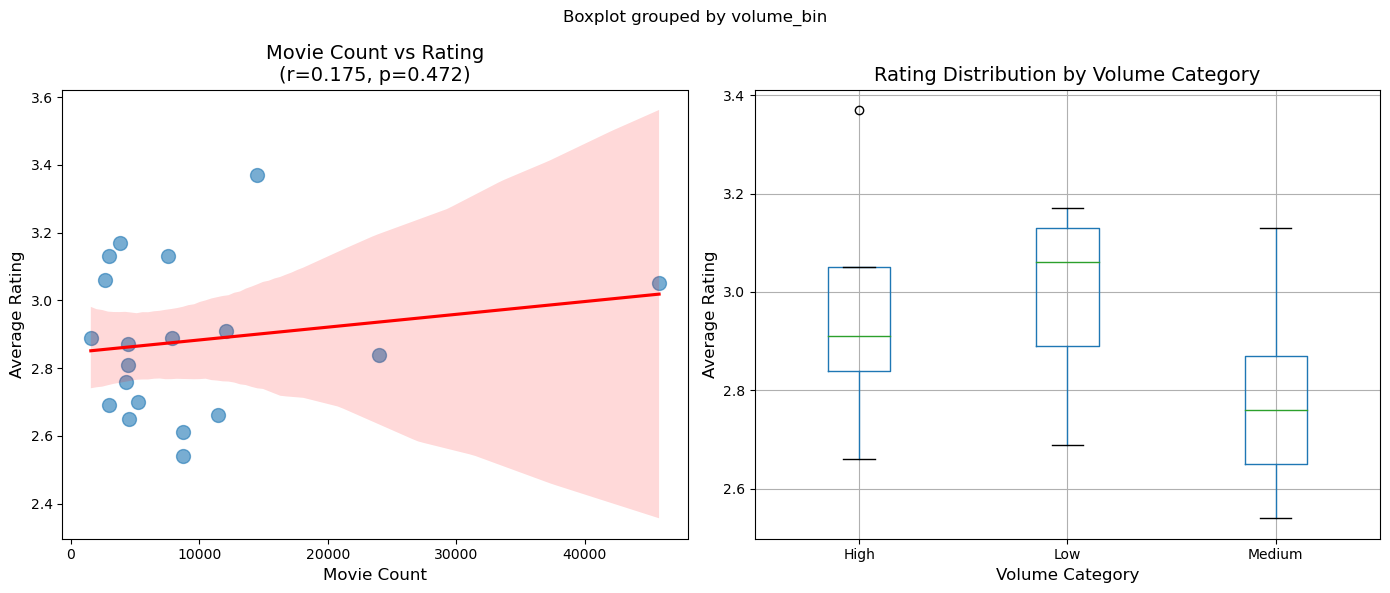

In [58]:
# Compute correlation
r_pearson, p_pearson = pearsonr(df_genre_corr['movie_count'], df_genre_corr['avg_rating'])

# Scatter plot with regression line
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot of Movie Count vs Rating with regression line 
axes[0].scatter(df_genre_corr['movie_count'], df_genre_corr['avg_rating'], s=100, alpha=0.6)
sns.regplot(x='movie_count', y='avg_rating', data=df_genre_corr, ax=axes[0], scatter=False, color='red', ci=95)
axes[0].set_xlabel('Movie Count', fontsize=12)
axes[0].set_ylabel('Average Rating', fontsize=12)
axes[0].set_title(f'Movie Count vs Rating\n(r={r_pearson:.3f}, p={p_pearson:.3f})', fontsize=14)

# Box plot by volume bin
df_genre_corr.boxplot(column='avg_rating', by='volume_bin', ax=axes[1])
axes[1].set_xlabel('Volume Category', fontsize=12)
axes[1].set_ylabel('Average Rating', fontsize=12)
axes[1].set_title('Rating Distribution by Volume Category', fontsize=14)

plt.tight_layout()
plt.show()

The scatterplot confirms negligible correlation (r = 0.175, p = 0.472), with a nearly flat regression line and wide confidence interval. High-rated genres span the full volume spectrum — Documentary (3.37) at 14,509 films, Music (3.17) at 3,842 films. The boxplots reveal overlapping distributions across volume categories with nearly identical medians (Low: 3.08, High: 2.93), reinforcing that production volume does not systematically determine quality.

In conclusion, visual patterns align with statistical findings: production volume does not predict genre quality. Documentary's success at high volume and Action's underperformance at moderate volume confirm that **genre-specific factors, not scale, determine quality outcomes**. Content optimization requires tailored, genre-by-genre strategies rather than universal volume policies.

### 7.1.4 Cross-Sectional Analysis Summary

Three statistical tests examined whether production volume predicts genre quality:

| Test | Method | Result | p-value | Significance |
|------|--------|--------|---------|--------------|
| Correlation | Pearson & Spearman | r = 0.175 / ρ = -0.096 | 0.472 / 0.697 | ✗ Not significant |
| Regression | OLS | β = 0.0000038 | 0.472 | ✗ Not significant |
| Group Comparison | Welch's t-test | Δ = -0.02 | 0.443 | ✗ Not significant |

All three tests converge: **production volume does not predict genre quality in cross-sectional analysis**. Correlation tests found no linear (r = 0.175) or monotonic (ρ = -0.096) relationship, regression showed near-zero slope with no predictive power (R² ≈ 0), and group comparison revealed no significant difference between high-volume and low-volume genres.

High-rated genres span the full volume spectrum — Documentary (3.37 rating) at 14,509 films, Music (3.17) at 3,842 films, Horror (2.54) at 8,191 films — confirming that **genre-specific factors rather than production scale determine quality outcomes**. 

These findings establish that cross-sectional comparisons cannot detect volume-quality relationships, setting the foundation for temporal analysis (Section 7.2) which examines whether within-genre quality changes as production scales over time.

### 7.2 Temporal Genre Performance: Stability and Trend Analysis

---

While Section 7.1 found no cross-sectional relationship between volume and quality, temporal analysis examines whether quality degrades **within genres** as production scales over time.

**Hypotheses to test:**
1. Do specific genres show statistically significant popularity trends? (7.2.2)
2. Which genres exhibit high volatility vs. stability? (7.2.3)
3. Does production volume growth correlate with quality decline within genres? (7.2.4)

This section tests the visual patterns identified in Section 6.3 using OLS regression, volatility metrics, and within-genre correlation analysis.

---

### 7.2.1 Data Scope and Preparation

The `2020–2024` period was excluded from all formal trend and regression analyses due to under-representation in the source dataset, with production volumes declining 95% across all genres compared to `2015–2019`. This exclusion prevents bias from incomplete records and ensures all statistical tests (covering 1990–2019) maintain data integrity, as noted in Section 6.3.

In [59]:
# Load data (query average rating and popularity by genre and release year)
query_genre_years = """
SELECT
    movie_genre,
    movie_release_year,
    COUNT(DISTINCT movie_id) AS movie_count,
    AVG(rating) AS avg_rating,
    AVG(movie_popularity) AS avg_popularity
FROM rated_movies_genres
WHERE 
    movie_release_year IS NOT NULL AND
    movie_genre != 'Unknown' AND 
    movie_release_year >= 1990
GROUP BY movie_genre, movie_release_year
ORDER BY movie_genre, movie_release_year;
"""
df_genre_years = pd.read_sql_query(query_genre_years, connection)

In [60]:
df_genre_years.head()

,movie_genre,movie_release_year,movie_count,avg_rating,avg_popularity
0,Action,1990,114,2.587719,10.061404
1,Action,1991,124,2.596774,24.846774
2,Action,1992,113,2.563717,15.433628
3,Action,1993,161,2.375155,11.055901
4,Action,1994,133,2.475940,44.834586


In [61]:
# Create 5-year bins
df_genre_years['bin_start'] = (df_genre_years['movie_release_year'] // 5) * 5
df_genre_years['Five_Year_Bin'] = df_genre_years['bin_start'].astype(str) + '-' + (df_genre_years['bin_start'] + 4).astype(str)

# Filter 1990-2019 for analysis (exclude incomplete 2020-2024)
df_filtered = df_genre_years[
    (df_genre_years['bin_start'] >= 1990) & 
    (df_genre_years['bin_start'] <= 2015)].copy()

# Aggregate to genre-period level
df_prep = df_filtered.groupby(['movie_genre', 'Five_Year_Bin', 'bin_start']).agg({
    'movie_count': 'sum',
    'avg_rating': 'mean',
    'avg_popularity': 'mean'
}).reset_index()

# Create numeric time variable (0-5 for six periods)
period_mapping = {
    '1990-1994': 0,
    '1995-1999': 1,
    '2000-2004': 2,
    '2005-2009': 3,
    '2010-2014': 4,
    '2015-2019': 5
}
df_prep['time_period'] = df_prep['Five_Year_Bin'].map(period_mapping)

print(f"Data prepared: {len(df_prep)} genre-period observations")
print(f"Genres: {df_prep['movie_genre'].nunique()}")
print(f"Periods: {sorted(df_prep['Five_Year_Bin'].unique())}")
print(f"Sample size per genre: ~{len(df_prep) / df_prep['movie_genre'].nunique():.1f} periods\n")

# Display first 10 rows
df_prep.head()

Data prepared: 114 genre-period observations
Genres: 19
Periods: ['1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2019']
Sample size per genre: ~6.0 periods



,movie_genre,Five_Year_Bin,bin_start,movie_count,avg_rating,avg_popularity,time_period
0,Action,1990-1994,1990,645,2.519861,21.246459,0
1,Action,1995-1999,1995,717,2.377229,24.816672,1
2,Action,2000-2004,2000,867,2.425967,53.670562,2
3,Action,2005-2009,2005,1081,2.426338,33.454717,3
4,Action,2010-2014,2010,1218,2.507866,15.844039,4


### 7.2.2 Genre Trend Analysis

Visual analysis (Section 6.3) revealed distinct temporal popularity patterns. OLS regression with time period (0-5 for 1990-2019) as predictor of average popularity tests whether observed trends represent statistically significant changes or random fluctuation. Negative slopes indicate decline; positive slopes indicate growth.

**Hypotheses:**
+ H0: Popularity shows no significant temporal trend (slope = 0)
+ H1: Popularity shows significant temporal trend (slope ≠ 0)

Genres to test include: 
+ **Western:** Hypothesized decline (135 → 31 popularity)
+ **Crime:** Hypothesized decline (148 → 15 popularity)
+ **War:** Hypothesized stability/decline (peaked at 97, then declined).

In [62]:
for genre in ['Western', 'Crime', 'War']:
    df_genre = df_prep[df_prep['movie_genre'] == genre].copy()
    
    Y = df_genre['avg_popularity']
    X = sm.add_constant(df_genre['time_period'])
    
    model = sm.OLS(Y, X).fit()
    
    print(f"\n\n\n=== OLS Regression Results: {genre} ===")
    print(model.summary())




=== OLS Regression Results: Western ===
                            OLS Regression Results                            
Dep. Variable:         avg_popularity   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.103
Date:                Thu, 20 Nov 2025   Prob (F-statistic):              0.353
Time:                        09:54:01   Log-Likelihood:                -30.082
No. Observations:                   6   AIC:                             64.16
Df Residuals:                       4   BIC:                             63.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const  

**Results:**

| Genre | Slope | p-value | R² | Significance |
|-------|-------|---------|-----|--------------|
| Crime | -26.26 | **0.002** | 0.930 | ✓ **Significant** |
| Western | -11.20 | 0.353 | 0.216 | ✗ Not significant |
| War | -13.36 | 0.110 | 0.511 | ✗ Not significant |

Based on the results, **Crime** demonstrates statistically significant linear decline (p = 0.002), losing ~26 popularity points per period with 93% of variance explained by time. This sustained decline from 148 (1990-1994) to 15 (2015-2019) represents a genuine, systematic downward trajectory.

**Western** shows no significant linear trend (p = 0.353) despite visual appearance of decline. It exhibits erratic popularity fluctuations: 134 → 39 → 3 → 72 → 56 → 32 across periods, creating a non-linear pattern that violates linear regression assumptions. Quadratic modeling also fails to detect significant trend (p = 0.417), indicating genuine volatility rather than systematic decline. Notably, Western production **increased** from 48 to 69 films (1990-2019) while popularity collapsed, suggesting quality dilution or audience abandonment despite growing supply.

**War** shows marginally non-significant decline (p = 0.110), with 51% of variance explained by time. The trend is suggestive but inconclusive at conventional significance levels.

In conclusion, only **Crime** shows a statistically significant temporal decline. Western's trend is erratic and non-linear, and War's pattern requires additional data for confirmation.

### 7.2.3 Genre Volatility Analysis
Visual analysis (Section 6.3) suggested Fantasy and Romance exhibit high volatility compared to more stable genres. This section quantifies volatility using standard deviation (SD) and coefficient of variation (CV) of popularity across 1990-2019.

The method here will, for each genre, calculate SD and CV of average popularity across six periods. Higher values indicate greater temporal instability.

**Hypothesis:**
+ **Null Hypothesis ($H_0$):** Fantasy and Romance do not show exceptionally high volatility relative to other genres
+ **Alternative Hypothesis ($H_1$):**  Fantasy and Romance rank among the most volatile genres

In [63]:
# Calculate volatility metrics
df_volatility = (
    df_prep.groupby('movie_genre')['avg_popularity']
    .agg(['std', 'mean', 'count'])
    .reset_index()
)
df_volatility.columns = ['movie_genre', 'popularity_sd', 'popularity_mean', 'n_periods']
df_volatility = df_volatility[df_volatility['popularity_mean'] > 0]
df_volatility['cv_percent'] = (df_volatility['popularity_sd'] / df_volatility['popularity_mean']) * 100

# Sort by SD and display
df_top_volatile_sorted = df_volatility.sort_values('popularity_sd', ascending=False).reset_index(drop=True)
df_top_volatile_sorted[['movie_genre', 'popularity_sd', 'cv_percent']]

,movie_genre,popularity_sd,cv_percent
0,Crime,50.963517,71.180668
1,Western,45.044804,80.554505
2,Fantasy,41.002202,67.510581
3,Mystery,35.958936,64.048548
4,War,34.959355,62.999484
5,History,26.133901,64.209297
6,Adventure,25.914878,60.638228
7,Thriller,22.916870,55.838325
8,Animation,22.378218,67.443380
9,Drama,21.242139,51.158420


**Fantasy** ranks as the **3rd most volatile genre** (SD = 41.00), **confirming the hypothesis**. Its substantial temporal instability is driven by a dramatic spike to 128 popularity (2000-2004) followed by a crash to approximately 30 (2010-2014).

**Romance**, however, ranks **11th** (SD = 20.12), showing **moderate-to-low volatility** and **contradicting the hypothesis**. The visually observed erratic fluctuations between 30-60 represent relatively small absolute swings, placing Romance's instability among more stable genres like Drama (SD = 21.24). This demonstrates that visual pattern recognition can be misleading when comparing genres with different baseline popularity levels.

**Crime** (SD = 50.96) and **Western** (SD = 45.04) exhibit the greatest volatility, but through different mechanisms: **Crime**'s high volatility stems from sustained directional decline (148 → 15), while **Western**'s reflects erratic, non-linear fluctuations (134→3→72→32). In contrast, **Fantasy's volatility** derives from a single sharp spike (128 in 2000-2004) followed by sustained decline.

**Drama** demonstrates the **lowest volatility among major genres** (SD = 21.24), maintaining consistency despite highest production volume.

Overall, genre volatility varies substantially (SD range: 1.18 to 50.96), with instability arising through different directional patterns (decline, erratic fluctuation, or single sharp spike). This demonstrates the necessity of quantitative analysis measurement over visual pattern assessment.

### 7.2.4 Volume-Quality Analysis Within High-Production Genres

While Section 7.1 found no cross-sectional relationship between volume and quality **across genres**, this section examines whether production growth correlates with quality decline **within individual genres** over time. The analysis focuses on the **top 5 high-production genres** to assess whether scaling output compromises quality.

The method will use Pearson correlation between production volume (movie_count) and average rating across six five-year periods for each genre. This will test if production volume growth correlates with rating decline within high-production genres across 1990-2019. Negative correlations indicate quality degradation with scaling.

**Hypotheses for each genre:**
+ **Null Hypothesis ($H_0$):** Genre quality shows no significant correlation with production volume over time
+ **Alternative Hypothesis ($H_1$):** Genre quality declines significantly as production volume increases

**Genres to test are:**
1. **Drama** - Highest volume (~2,000 → ~8,700 films, 4.3x growth)
2. **Comedy** - Second highest volume (substantial growth)
3. **Documentary** - High volume with observed quality decline (3.57 → 3.27, Section 6.3)
4. **Romance** - High volume, moderate volatility
5. **Thriller** - High volume, stable performance

In [64]:
# Create an empty list to store results
results_list = []

# Loop through genres and collect the data
for genre in ['Drama', 'Comedy', 'Documentary', 'Romance', 'Thriller']:
    df_genre = df_prep[df_prep['movie_genre'] == genre].copy()

    # Run calculations
    r, p = pearsonr(df_genre['movie_count'], df_genre['avg_rating'])
    
    # Determine the conclusion string
    if p < 0.05:
        conclusion = "✓ Significant NEGATIVE correlation" if r < 0 else "✓ Significant POSITIVE correlation"
    else:
        conclusion = f"✗ No significant relationship"
        
    # Append all results as a dictionary to the list
    results_list.append({
        'Genre': genre,
        'Periods (n)': len(df_genre),
        'Volume Range': f"{df_genre['movie_count'].min():,.0f} - {df_genre['movie_count'].max():,.0f}",
        'Rating Range': f"{df_genre['avg_rating'].min():.2f} - {df_genre['avg_rating'].max():.2f}",
        'Correlation (r)': r,
        'P-value (p)': p,
        'Significance': conclusion
    })

# Convert the list of results into a DataFrame
df_results = pd.DataFrame(results_list)

# Display DataFrame
df_results.style.format({'Correlation (r)': '{:.3f}','P-value (p)': '{:.4f}'}).hide(axis="index")

Genre,Periods (n),Volume Range,Rating Range,Correlation (r),P-value (p),Significance
Drama,6,"2,028 - 8,697",2.91 - 3.09,-0.805,0.0535,✗ No significant relationship
Comedy,6,"1,252 - 3,633",2.65 - 2.82,-0.471,0.3452,✗ No significant relationship
Documentary,6,"429 - 4,836",3.27 - 3.57,-0.937,0.0058,✓ Significant NEGATIVE correlation
Romance,6,"559 - 1,572",2.69 - 2.90,-0.934,0.0064,✓ Significant NEGATIVE correlation
Thriller,6,"633 - 2,170",2.49 - 2.63,-0.438,0.3849,✗ No significant relationship


The within-genre temporal analysis reveals clear differences in how production scaling affects quality. **Documentary and Romance show statistically significant volume-quality degradation.**

**Documentary** exhibits the strongest volume-quality inverse relationship (r = -0.937, p = 0.006), confirming Section 6.3 visual observations. The genre's 11x growth (429 → 4,836 films) correlates strongly with a 0.30-point rating decline (3.57 → 3.27), representing an 8.4% quality erosion. **Romance** demonstrates an equally strong negative correlation (r = -0.934, p = 0.006) despite only 3x growth, suggesting some genres are more sensitive to volume-quality tradeoffs.

**Drama** shows strong negative correlation (r = -0.805) but misses conventional statistical significance (p = 0.054). This represents a borderline case, suggesting genuine volume-quality tension that statistical power is insufficient to confirm with only 6 time points. 

**Comedy and Thriller maintained quality despite volume growth.** **Comedy** (r = -0.471, p = 0.345) and **Thriller** (r = -0.438, p = 0.385) show weak, non-significant negative correlations. **Comedy** successfully tripled production (1,252 → 3,633) while maintaining stable ratings (~2.7-2.8), demonstrating that high-volume production does not inherently compromise quality.

Overall, **2 of 5 high-production genres** show statistically significant volume-quality inverse relationships, confirming that excessive scaling can compromise quality — but this is **genre-specific**. These findings refine Section 7.1 cross-sectional results: while aggregate volume does not predict quality **across genres**, temporal scaling **within genres** reveals selective degradation risks, particularly those for high-baseline-quality. Genres may maintain stable quality rankings relative to each other while simultaneously experiencing absolute quality decline as production scales.

### 7.2.5 Temporal Analysis Summary

Temporal analysis across 1990-2019 reveals **genre-specific dynamics** masked by aggregate cross-sectional comparisons. **Crime** shows statistically significant linear decline, while **Western** exhibits erratic non-linear fluctuations without significant trend.

**Fantasy** ranks among the most volatile genres, whereas **Romance** shows moderate-low volatility, contrary to visual expectations. 

**Documentary** and **Romance** demonstrate significant volume-quality degradation as production scaled, while **Comedy** and **Thriller** maintained quality despite similar expansion rates.

The key patterns observed: Only 1 of 3 hypothesized declining genres shows robust linear trends; Volatility varies continuously through different mechanisms; and high-baseline-quality genres face greater scaling risks than moderate-quality genres.

The critical insight is that cross-sectional analysis (Section 7.1) found no volume-quality relationship **across genres**, but temporal analysis reveals significant degradation **within specific genres**. This demonstrates that aggregate comparisons can mask temporal quality decline—volume-quality relationships are genre-dependent, with expansion outcomes determined by genre identity, baseline quality, and curation infrastructure rather than scale alone.

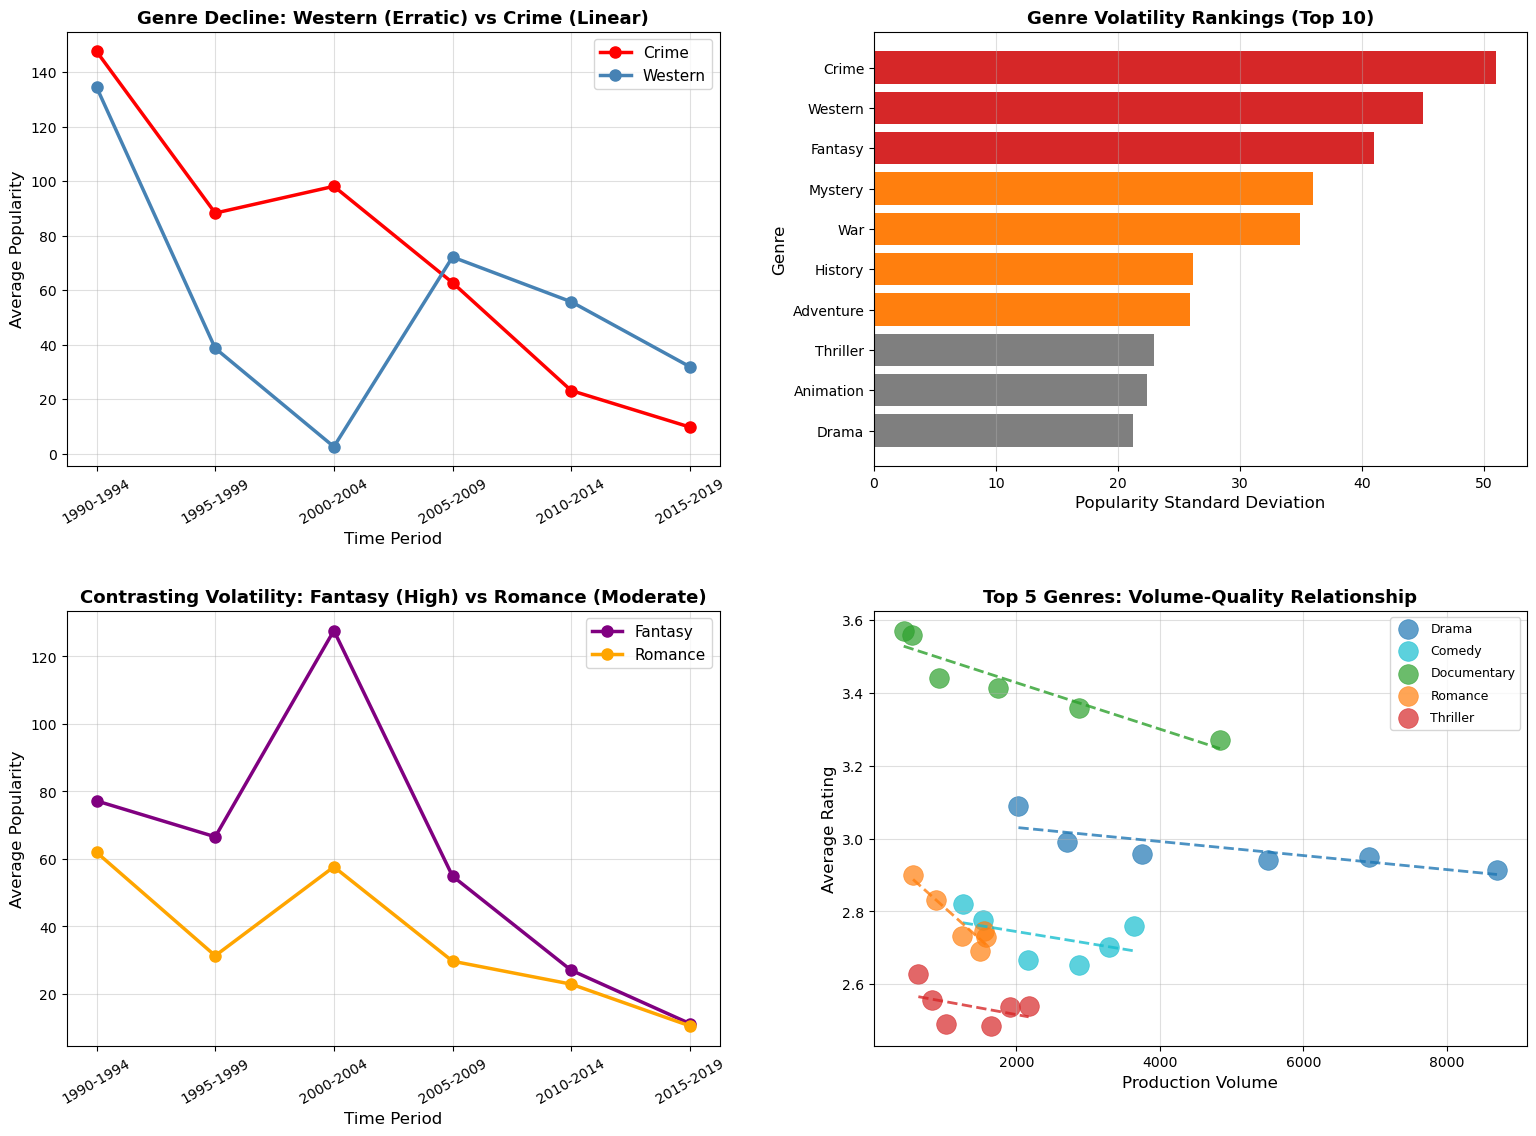

In [65]:
# Figure Setup
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Western vs Crime Decline
for genre, color in [('Crime', 'red'), ('Western', 'steelblue')]:
    genre_data = df_prep[df_prep['movie_genre'] == genre].sort_values('time_period')
    axes[0, 0].plot(genre_data['Five_Year_Bin'], genre_data['avg_popularity'], 'o-',
                    label=genre, color=color, linewidth=2.5, markersize=8)
axes[0, 0].set_xlabel('Time Period', fontsize=12)
axes[0, 0].set_ylabel('Average Popularity', fontsize=12)
axes[0, 0].set_title('Genre Decline: Western (Erratic) vs Crime (Linear)', fontsize=13, fontweight='bold')
axes[0, 0].legend(fontsize=11)
axes[0, 0].tick_params(axis='x', rotation=30)
axes[0, 0].grid(alpha=0.4)

# Plot 2: Volatility Rankings
top_volatile = df_top_volatile_sorted.head(10)
if not top_volatile.empty:
    # Color gradient: Top 3 red, 4-7 orange, rest gray
    colors_vol = ['#d62728' if i < 3 else '#ff7f0e' if i < 7 else '#7f7f7f' for i in range(len(top_volatile))]
    axes[0, 1].barh(top_volatile['movie_genre'], top_volatile['popularity_sd'], color=colors_vol)
    axes[0, 1].set_ylabel('Genre', fontsize=12)
    axes[0, 1].set_xlabel('Popularity Standard Deviation', fontsize=12)
    axes[0, 1].set_title('Genre Volatility Rankings (Top 10)', fontsize=13, fontweight='bold')
    axes[0, 1].grid(axis='x', alpha=0.4)
    axes[0, 1].invert_yaxis()  # Highest at top
else:
    axes[0, 1].text(0.5, 0.5, 'No volatility data found', ha='center', va='center')

# Plot 3: Romance vs Fantasy
for genre, color in [('Fantasy', 'purple'), ('Romance', 'orange')]:
    genre_data = df_prep[df_prep['movie_genre'] == genre].sort_values('time_period')
    axes[1, 0].plot(genre_data['Five_Year_Bin'], genre_data['avg_popularity'], 'o-',
                    label=genre, color=color, linewidth=2.5, markersize=8)
axes[1, 0].set_xlabel('Time Period', fontsize=12)
axes[1, 0].set_ylabel('Average Popularity', fontsize=12)
axes[1, 0].set_title('Contrasting Volatility: Fantasy (High) vs Romance (Moderate)', fontsize=13, fontweight='bold')
axes[1, 0].legend(fontsize=11)
axes[1, 0].tick_params(axis='x', rotation=30)
axes[1, 0].grid(alpha=0.4)

# Plot 4: Top 5 Genres Volume-Quality
for genre, color in [('Drama', '#1f77b4'), ('Comedy', '#17becf'), ('Documentary', '#2ca02c'),
                     ('Romance', '#ff7f0e'), ('Thriller', '#d62728')]:
    genre_data = df_prep[df_prep['movie_genre'] == genre]
    axes[1, 1].scatter(genre_data['movie_count'], genre_data['avg_rating'], 
                        s=200, alpha=0.7, label=genre, color=color, linewidth=0.5)
    # Regression line
    if len(genre_data) >= 3:
        z = np.polyfit(genre_data['movie_count'], genre_data['avg_rating'], 1)
        p_fit = np.poly1d(z)
        x_line = np.linspace(genre_data['movie_count'].min(), genre_data['movie_count'].max(), 100)
        axes[1, 1].plot(x_line, p_fit(x_line), color=color, linestyle='--', linewidth=2, alpha=0.8)

axes[1, 1].set_xlabel('Production Volume', fontsize=12)
axes[1, 1].set_ylabel('Average Rating', fontsize=12)
axes[1, 1].set_title('Top 5 Genres: Volume-Quality Relationship', fontsize=13, fontweight='bold')
axes[1, 1].legend(fontsize=9, loc='best', labelspacing=0.75)
axes[1, 1].grid(alpha=0.4)

plt.tight_layout(pad=3)
plt.show()

This four-panel visualization validates Section 7.2 statistical findings. The **top-left** panel contrasts **Crime**'s steady linear decline with **Western**'s erratic non-linear fluctuations (7.2.2). The **top-right** panel presents the volatility hierarchy, confirming **Crime**, **Western**, and **Fantasy** as the most unstable major genres (7.2.3). The **bottom-left** chart directly compares **Fantasy**'s "boom-bust" spike-and-crash pattern against the moderate, stable fluctuations of **Romance** (7.2.3). Finally, the **bottom-right** panel illustrates the different volume-quality relationships, showing the steep, significant negative slopes (p < 0.01) for **Documentary** and **Romance** versus the flat, non-significant trajectories for **Comedy** and **Thriller** (7.2.4).

### 7.3 User Engagement Statistical Analysis

Section 6.4 analyzed critique engagement patterns, revealing that **Drama** achieves both high volume (160,723 critiques) and high engagement quality (0.79 avg likes), while **Comedy** shows high volume (51,426) but lowest engagement quality (0.63 avg likes). This section statistically tests whether these patterns represent systematic relationships or genre-specific anomalies.

The following questions will be addressed:
1. Does critique volume systematically correlate with engagement quality? (7.3.1)
2. Do high-volume and low-volume genres differ significantly in engagement quality? (7.3.2)
3. Does genre rating predict engagement quality? (7.3.3)

---

### 7.3.1 Critique Volume vs Engagement Quality Correlation

This test examines whether critique volume systematically correlates with engagement quality (avg likes per critique) across genres.

Section 6.4 visual inspection suggested "no universal inverse relationship between scale and quality," citing Drama (high volume, high engagement) and Comedy (high volume, low engagement) as evidence. Statistical testing validates whether patterns are systematic or genre-specific. 

**Hypotheses:**
- $H_0$: No correlation exists between critique volume and engagement quality
- $H_1$: Significant correlation exists between critique volume and engagement quality

The approach here uses Pearson and Spearman correlation using weighted critique data (`df_critiques_genre`) from Section 6.4.

In [66]:
# Correlation tests
r_pearson, p_pearson = pearsonr(df_critiques_genre['total_critiques'], 
                                  df_critiques_genre['avg_likes_per_critique'])

r_spearman, p_spearman = spearmanr(df_critiques_genre['total_critiques'], 
                                     df_critiques_genre['avg_likes_per_critique'])

# Create results table
correlation_results = pd.DataFrame({
    'Test': ['Pearson', 'Spearman'],
    'r': [r_pearson, r_spearman],
    'p-value': [p_pearson, p_spearman],
    'Significant': ['✓ Significant' if p_pearson < 0.05 else '✗ Not Significant', 
                    '✓ Significant' if p_spearman < 0.05 else '✗ Not Significant']
})

display(correlation_results)

if p_pearson < 0.05:
    direction = "NEGATIVE (inverse)" if r_pearson < 0 else "POSITIVE"
    print(f"\n✓ Significant {direction} correlation detected")
else:
    print(f"\n✗ No significant correlation (p = {p_pearson:.4f})")
    print("Interpretation: Engagement quality is not systematically determined by critique volume.")

,Test,r,p-value,Significant
0,Pearson,0.312469,0.192760,✗ Not Significant
1,Spearman,0.292619,0.224085,✗ Not Significant



✗ No significant correlation (p = 0.1928)
Interpretation: Engagement quality is not systematically determined by critique volume.


### 7.3.2 Group Comparison: High-Volume vs Low-Volume Engagement

This test determines whether high-volume and low-volume genres show statistically significant different engagement quality.

Section 6.4 suggested niche genres (Horror 0.79, Mystery 0.78) achieve high engagement with lower volume, while mainstream genres show mixed patterns (Drama 0.79 high, Comedy 0.63 low). Group comparison tests whether volume level predicts engagement.

**Hypotheses:**
- $H_0$: High-volume and low-volume genres have equal mean engagement quality (μ_low = μ_high)
-  $H_1$: High-volume and low-volume genres have significantly different engagement quality (μ_low ≠ μ_high)

Two-sample t-test comparing avg_likes_per_critique between extreme volume groups (bottom 25% vs top 25% by quartiles) is employed.

In [67]:
# Use quartiles to compare extreme groups
q1 = df_critiques_genre['total_critiques'].quantile(0.25)
q3 = df_critiques_genre['total_critiques'].quantile(0.75)

low_vol_genres = df_critiques_genre[df_critiques_genre['total_critiques'] <= q1]
high_vol_genres = df_critiques_genre[df_critiques_genre['total_critiques'] >= q3]

low_vol = low_vol_genres['avg_likes_per_critique']
high_vol = high_vol_genres['avg_likes_per_critique']

# Descriptive statistics
desc_stats = pd.DataFrame({
    'Group': ['Low Volume', 'High Volume', 'Mean Difference'],
    'n': [len(low_vol), len(high_vol), '—'],
    'Mean': [low_vol.mean(), high_vol.mean(), high_vol.mean() - low_vol.mean()],
    'SD': [low_vol.std(), high_vol.std(), np.nan]
})

# Two-tailed t-test
stat, p_value = ttest_ind(low_vol, high_vol, equal_var=False)

# Display results
print(f"Quartile thresholds: Q1 = {q1:.0f}, Q3 = {q3:.0f}\n")
display(desc_stats.style.format({'Mean': '{:.3f}', 'SD': '{:.3f}'}))

print(f"\nWelch's t-test: t = {stat:.3f}, p = {p_value:.4f}")
    
if p_value < 0.05:
    print("✓ Significant difference in engagement quality between volume groups")
else:
    print("✗ No significant difference between volume groups")
    print("\nInterpretation: Even comparing extreme groups, volume does not predict engagement quality.")

Quartile thresholds: Q1 = 6549, Q3 = 25927



,Group,n,Mean,SD
0,Low Volume,5,0.658,0.127
1,High Volume,5,0.730,0.060
2,Mean Difference,—,0.072,nan



Welch's t-test: t = -1.148, p = 0.2970
✗ No significant difference between volume groups

Interpretation: Even comparing extreme groups, volume does not predict engagement quality.


### 7.3.3 Genre Rating vs Engagement Quality

This test determines whether higher-rated genres inspire more engaged critique discussions.

The rationale posits that content quality drives engagement quality, meaning that high-rated genres should receive more thoughtful, well-received critiques (higher avg likes).  This is a formal test of the observed variance in Section 6.4: Documentary (3.37 rating, 0.75 likes) and Horror (2.54 rating, 0.79 likes) show varied and unclear patterns. 

**Hypotheses:**
- $H_0$: No correlation between genre average rating and engagement quality
- $H_1$: Significant correlation between genre rating and engagement quality

Pearson correlation will be used to test the relationship between avg_rating and avg_likes_per_critique.

In [68]:
# Merge rating data with critique data
df_engagement_analysis = df_critiques_genre.merge(
    df_genre_corr[['movie_genre', 'avg_rating']], 
    on='movie_genre', 
    how='inner')

print(f"Genres analyzed: n = {len(df_engagement_analysis)}")
print(f"Rating range: {df_engagement_analysis['avg_rating'].min():.2f} - {df_engagement_analysis['avg_rating'].max():.2f}")
print(f"Engagement range: {df_engagement_analysis['avg_likes_per_critique'].min():.2f} - {df_engagement_analysis['avg_likes_per_critique'].max():.2f}\n")

# Correlation test
r_rating, p_rating = pearsonr(df_engagement_analysis['avg_rating'], 
                               df_engagement_analysis['avg_likes_per_critique'])

print(f"Pearson correlation: r = {r_rating:.3f}, p = {p_rating:.4f}\n")

if p_rating < 0.05:
    print(f"✓ Significant correlation (p < 0.05)")
    if r_rating > 0:
        print("Interpretation: Higher-rated genres receive more engagement on critiques")
    else:
        print("Interpretation: Higher-rated genres receive less engagement (unexpected)")
else:
    print(f"✗ No significant relationship (p = {p_rating:.4f})")
    print("Interpretation: Genre rating does not predict engagement quality")

Genres analyzed: n = 19
Rating range: 2.54 - 3.37
Engagement range: 0.51 - 0.79

Pearson correlation: r = 0.121, p = 0.6218

✗ No significant relationship (p = 0.6218)
Interpretation: Genre rating does not predict engagement quality


### 7.3.4 User Engagement Summary

Three statistical tests examined whether critique volume or genre quality systematically predict engagement quality across genres:

| Test | Variables | r / Difference | p-value | Significance |
|------|-----------|---------------|---------|--------------|
| Volume-Engagement | Critique Volume vs. Avg. Likes | r = 0.312 | 0.193 | ✗ Not significant |
| High vs. Low Volume | Bottom 25% vs. Top 25% | Δ = 0.072 | 0.297 | ✗ Not significant |
| Rating-Engagement | Genre Rating vs. Avg. Likes | r = 0.121 | 0.621 | ✗ Not significant |

Key findings include:

   1. **Volume-Engagement Correlation** found no significant relationship. Despite varied patterns — Drama (160,723 critiques, 0.79 likes) versus Comedy (51,426 critiques, 0.63 likes) — no systematic correlation emerged across all genres.

   2. **Volume Group Comparison** revealed no significant difference. Low-volume genres averaged 0.658 engagement quality, while high-volume averaged 0.730 — a 0.072-point difference within normal statistical variation.

   3. **Rating-Engagement Correlation** showed no significant relationship, indicating that content quality and critique engagement operate independently.

All three tests converge on the same conclusion: **engagement quality is genre-specific rather than systematically determined by volume or rating**. Drama achieves both high volume and high engagement, Comedy shows high volume but low engagement, while Horror maintains high engagement with low volume. These patterns reflect **genre identity, community culture, and content appeal** rather than production scale or aggregate quality metrics.

These findings parallel Section 7.2 conclusions: just as volume-quality relationships proved genre-dependent, engagement patterns are also genre-specific. **No universal rules govern audience behavior** — Drama's success demonstrates that scale can coexist with quality and engagement when genre identity aligns with community expectations, while Comedy's underperformance suggests content-audience misalignment rather than volume-driven degradation. Strategic optimization requires **genre-by-genre analysis** rather than aggregate volume or quality targets.

## 8. Conclusions and Recommendations

### 8.1 Key Findings

This project thoroughly analyzed the MUBI movies dataset containing 226575 movie titles across 19 genres from 1898-2021. The analysis tested genre performance across volume, quality, and user engagement. Three major conclusions stand out:

- **No universal Volume-Quality relationship exists.** Cross-sectional analysis found no significant correlation between production volume and genre ratings (r = 0.175, p = 0.472). High-rated genres span the full volume spectrum — Documentary (3.37 rating, 14,509 films) to Music (3.17, 3,842 films) — confirming that genre-specific factors rather than scale determine quality outcomes.

- **Temporal scaling risks are genre-dependent.** While cross-sectional snapshots show no relationship, temporal analysis reveals significant quality degradation within specific genres as they scaled. Documentary (r = -0.937, p = 0.006) and Romance (r = -0.934, p = 0.006) experienced measurable quality erosion during expansion, while Comedy and Thriller maintained standards despite similar growth rates. High-baseline-quality genres face greater scaling vulnerability than moderate-quality genres.

- **Engagement quality is genre-specific, not metric-driven.** User engagement is not predicted by volume or ratings. Drama achieves both high volume and high engagement (0.79 avg likes), Comedy shows high volume but lowest engagement (0.63), while Horror maintains high engagement with low volume. These patterns reflect genre identity and community culture rather than production metrics.

---

### 8.2 Critical Methodological Insight

**Cross-sectional analysis alone is insufficient for strategic decision-making.** Documentary illustrates the risk: cross-sectional analysis shows a "high-volume, high-quality genre" (3.37 rating, 14,509 films), suggesting expansion is viable. However, 85% of Documentary films were produced during 1990-2019, during which quality declined significantly from 3.57 to 3.27 (p = 0.006). The aggregate 3.37 rating masks this temporal degradation.

A recommendation to expand Documentary production based solely on cross-sectional metrics would accelerate quality erosion. Temporal analysis provides the actionable insight: constrain expansion and focus on curation. This demonstrates that aggregate metrics can mislead strategy when they mask temporal quality trajectories. Therefore, it is best to always combine static analysis with temporal trend monitoring before making production decisions.

---

### 8.3 Strategic Recommendations

Based on these findings, the following recommendations apply to content strategy and platform optimization:

**1. Implement genre-specific scaling strategies.** Each genre requires tailored approaches based on its quality trajectory:
- **Drama** scales successfully. Current curation standards should be maintained.
- **Documentary/Romance:** These genres are highly sensitive to expansion. Therefore, strict curation standards should be implemented to prevent further quality erosion.
- **Comedy/Thriller:** These genres maintain quality at high volume; scaling should be continued. 
- **Horror/Mystery:** Invest strategically in niche content to leverage passionate, high-engagement communities

**2. Temporal quality monitoring should be established.** Track within-genre quality trends over time rather than relying on static aggregate metrics. Early detection of degradation signals enables intervention before audience erosion becomes entrenched.

**3. Investigate the Comedy Engagement Gap.** Comedy's anomalous low engagement (0.63) despite high volume (51,426 critiques) suggests systemic content-audience misalignment requiring targeted research—potentially content tone, critique culture, or audience expectation mismatch.

**4. Manage Declining Genres Strategically.** Crime's significant linear decline (p = 0.002) indicates sustained audience erosion. Shift investment toward limited prestige projects rather than high-volume production. Western's erratic volatility suggests treating it as cyclical, event-driven content rather than sustained investment.

---

### 8.4 Limitations

- **Temporal constraints:** Only 6 five-year periods limit statistical power for detecting moderate effects

- **Data completeness:** 2020-2024 excluded due to 95% volume collapse across all genres, preventing analysis of recent trends

- **Rating coverage:** 37% of movies remain unrated, indicating potential selection bias toward more popular or discoverable titles

- **Causation:** Statistical associations do not establish causal mechanisms; genre-specific degradation patterns may be driven by unmeasured confounders

- **Genre classification:** Of 226,575 MUBI movies, only 139,237 (61%) were successfully matched with genre information. Additionally, 52% of matched films have multiple genres, requiring weighted attribution that may not fully capture cross-genre dynamics

---

### 8.5 Future Research

- **Causal mechanisms:** Investigate what drives genre-specific quality degradation during scaling (e.g., curation capacity, talent pool dilution, audience saturation)
- **Movie-level analysis:** Analyze individual film quality trajectories within genres to identify outliers and success patterns
- **Content characteristics:** Examine whether runtime, budget, or cast composition mediate volume-quality relationships
- **Comedy engagement gap:** Conduct qualitative research on Comedy's anomalous low engagement despite high volume
- **Platform generalization:** Test whether findings replicate across streaming platforms (Netflix, Amazon) and rating systems (IMDb, Rotten Tomatoes)
- **Audience segmentation:** Examine whether engagement patterns differ by user demographics or viewing history